# 1.  Exploratory Data Analysis

**Objectif**
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Développer une premiere stratégie de modélisation

**Checklist de base**
- [ ] Analyse de forme:
    - *variable target* : SARS-Cov-2 exam result
    - *ligne et colonne* : (5644, 111)
    - *Type de variable* : Qualitative (37 + 4) & Quantitative (70)
    - *Analyse des valeurs manquantes* :
        - on remarque qu'on a beaucoup de valeur manquante(moitié des variables > 90% de NaN).
        - on a 2 groupes de donnés : (76% -> Test viral) & (89% -> Globules blanc/Rouges ou taux sanguin).


- [ ] Analyse de fond:
    - *Visualisation de la target* : 10% de cas positif et 90% de cas négatif
    - *Signification des variables* :
        - les variables continues sont standardisées
        - Age quantile : difficile à interpréter, on croit que clairement ces données ont été traitées, on pourait penser 0-5, mais cela pourrait être une transformation mathématique. Cependant, on ne peut pas savoir la vérité, car la personne qui a mis le dataset sur kaggle ne nous a rien informé, il ne le précise nulle part. Mais ce n'est pas très important.
        - Les variables qualitatives sont binaires(0, 1), ce sont des variables virale. Mais nous remarquons que Rhinovirus semble très élevé
    - *Relation Variables et target* :
        - Target/ Blood
            Il semble que le taux de
            - Platelets,
            - Monocytes,
            - Leucocytes
        soient liés aux Covid 19
        - Target / Age quantile
                les individus faibles sont très peu contaminés ? → attention on ne connait pas l'age et on ne sait pas quand date le dataset (S'il s'agit des enfants, on sait que les enfants sont autant touchés que les adultes). En revanche cette variable pourra être intéressante pour comparer les résultats de test sanguins.
        - Target / Viral
                les doubles maladies sont très rares. Rhinovirus/Entérovirus positif - Covid-19 négatif ? → hypothèse à tester ? mais il est possible que la région ait subie une épidémie de ce virus. De plus on peut bien avoir 2 virus en même temps. Tout ça n'a aucun lien avec le coronaVirus



**Analyse plus détaillée**

- [ ]  Relation Variables / variables
    - blood_data / blood_data : certaines variables sont très corrélées : +0.9 (à surveiller plus tard)
    - blood_data / Age : On observe une très faible corrélation entre age et taux sanguin
    - viral / viral : Influenza rapid test donne de très mauvais résultats, il faudrait peut-être le laisser tomber.
    - Relation entre être malade (patient testé positif de Influenza ou Rhinovirus, ...) et le taux de sanguin :
        - Les taux sanguins entre malade et la covid 19 sont différents
    - Relation Hospitalisation
        - Dans notre dataset on a trois variables :
                - Patient addmited to regular ward (1=yes, 0=no)
                - Patient addmited to semi-intensive unit (1=yes, 0=no)
                - Patient addmited to intensive care unit (1=yes, 0=no)
    - Relation Hospitalisation / blood où est malade
        Intéressant dans le cas où on voudrait prédire dans quel service un patient devrait aller

- [ ]  NaN analyse :
    - viral : 1350(92/8)
    - blood : 600 (87/13)
    - booth : 90


**Hypothèses nulle (H0)**
 - Les individus atteints du covid 19 ont un taux de Leukocytes, Monocytes, Platelets significativement différents
        - H0 = les taux moyens sont ÉGAUX chez les individus positifs et négatifs. --> **H0 est FAUSSE**
 - Les individus atteints d'une quelconque maladie ont des taux significativement différents
        - H0 = les taux moyens sont ÉGAUX chez les individus malades ou non malades. --> H0 fausse pour 5/14

****


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_covid19 = pd.read_excel("./data/dataset.xlsx")

# Analyse de la forme des données

In [3]:
df_covid19.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

In [4]:
df_covid19.shape # pour trouver le nombre de lignes et colonnes

(5644, 111)

In [5]:
# Il nous est important de savoir quel son les variables qualitatives et aussi les variables quantitatives
df_covid19.dtypes.value_counts()

float64    70
object     37
int64       4
Name: count, dtype: int64

* Interessons nous aux valeurs manquantes

In [6]:
import seaborn as sns

<Axes: >

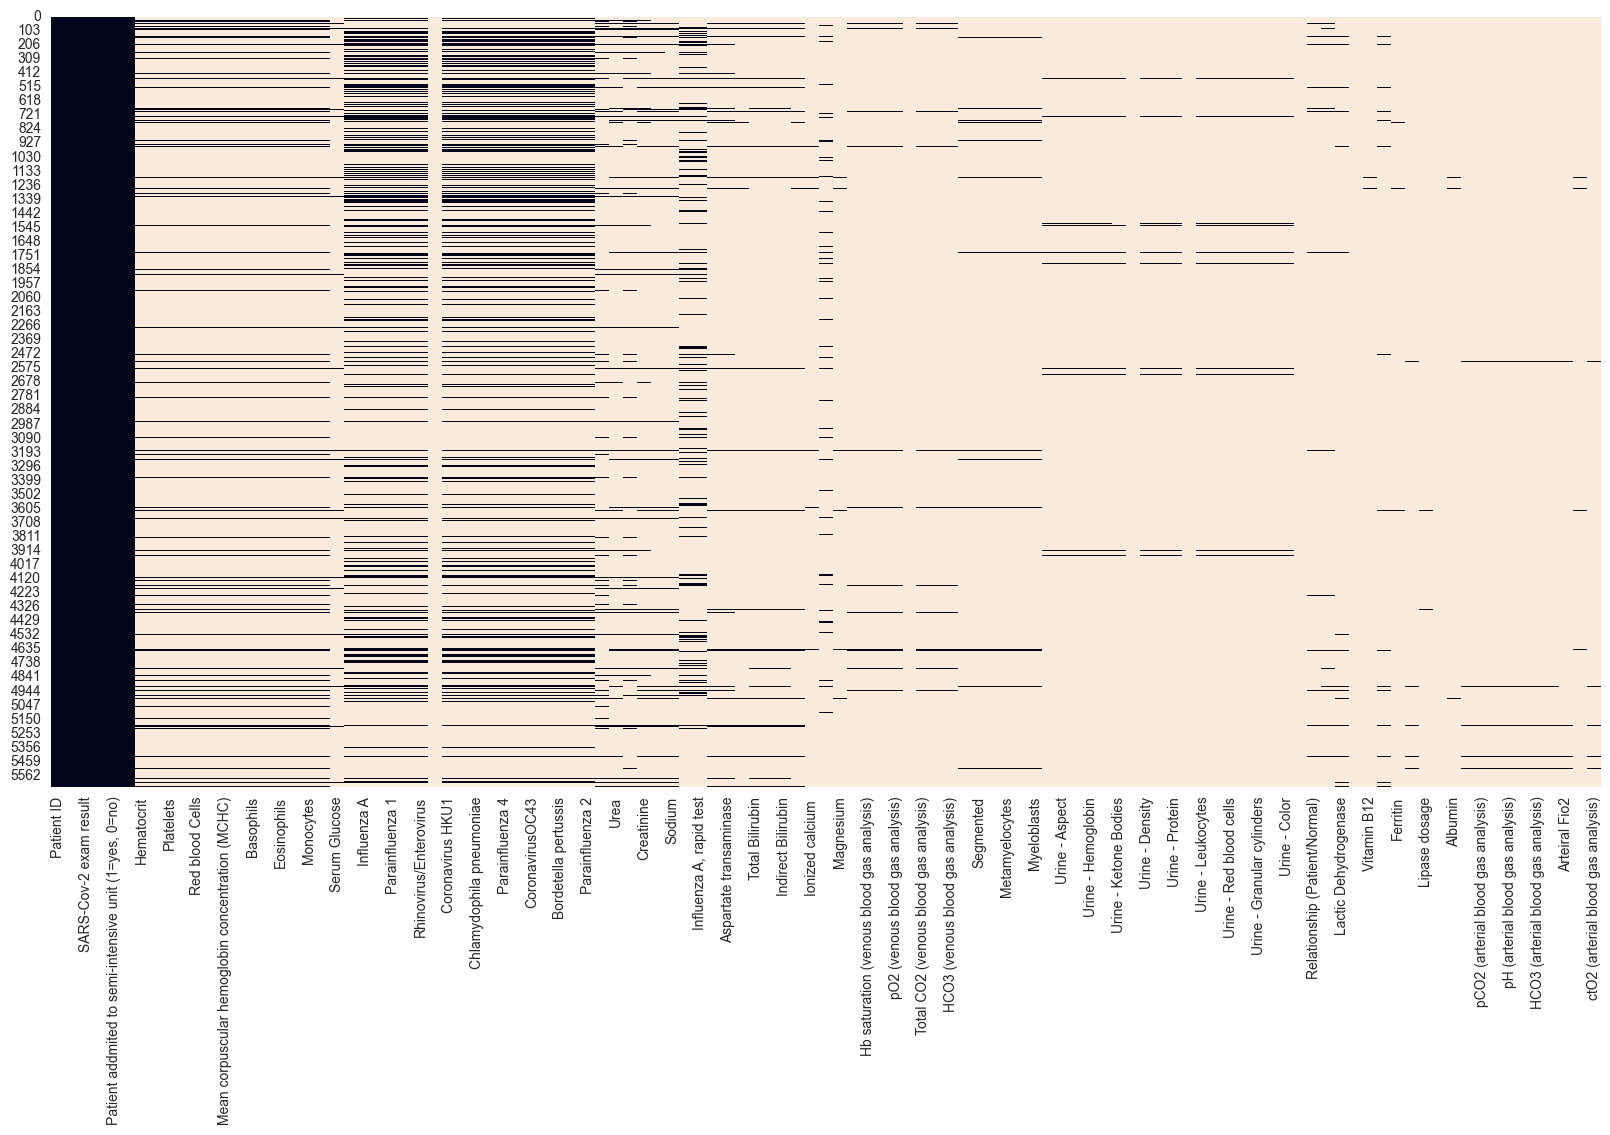

In [7]:
# on affiche une vision globale de notre dataset pour observer les valeurs manquantes
plt.figure(figsize=(20, 10))
sns.heatmap(df_covid19.isna(), cbar=False)

In [8]:
# affichons le pourcentage des valeurs manquantes
(df_covid19.isna().sum()/df_covid19.shape[0])

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
                                                           ...   
HCO3 (arterial blood gas analysis)                       0.995216
pO2 (arterial blood gas analysis)                        0.995216
Arteiral Fio2                                            0.996456
Phosphor                                                 0.996456
ctO2 (arterial blood gas analysis)                       0.995216
Length: 111, dtype: float64

Vraiment il n'y a rien a faire avec variable au tour de 98% de valeurs manquantes

*******
# ANALYSE DE FOND

## 1. Visualisation initiale - Elimination des colonnes inutiles

In [9]:
df_covid19 = df_covid19[df_covid19.columns[df_covid19.isna().sum()/df_covid19.shape[0] < 0.9]]
df_covid19.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...    Adenovirus  \
0         NaN        NaN                    NaN  ...           NaN   
1    -0.02234  -0.517413               0.010677  ...  not_detected   
2         NaN        NaN                    NaN  ...           NaN   
3         NaN        NaN                    NaN  ...           NaN   
4         NaN        NaN                    NaN  ...  not_detected   

   Parainfluenza 4  Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  \
0              NaN              NaN              NaN              NaN   
1     not_detected     not_detected     not_detected     not_detected   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4     not_detected     not_detected     not_detected     not_detected   

   Bordetella pertussis  Metapneumovirus  Parainfluenza 2  \
0                   NaN              NaN              NaN   
1          not_detected     not_detected     not_detected   
2                   NaN              NaN              NaN   
3                   NaN              NaN              NaN   
4          not_detected     not_detected     not_detected   

   Influenza B, rapid test  Influenza A, rapid test  
0                      NaN                      NaN  
1                 negative                 negative  
2                      NaN                      NaN  
3                      NaN                      NaN  
4                      NaN                      NaN  

[5 rows x 39 columns]

<Axes: >

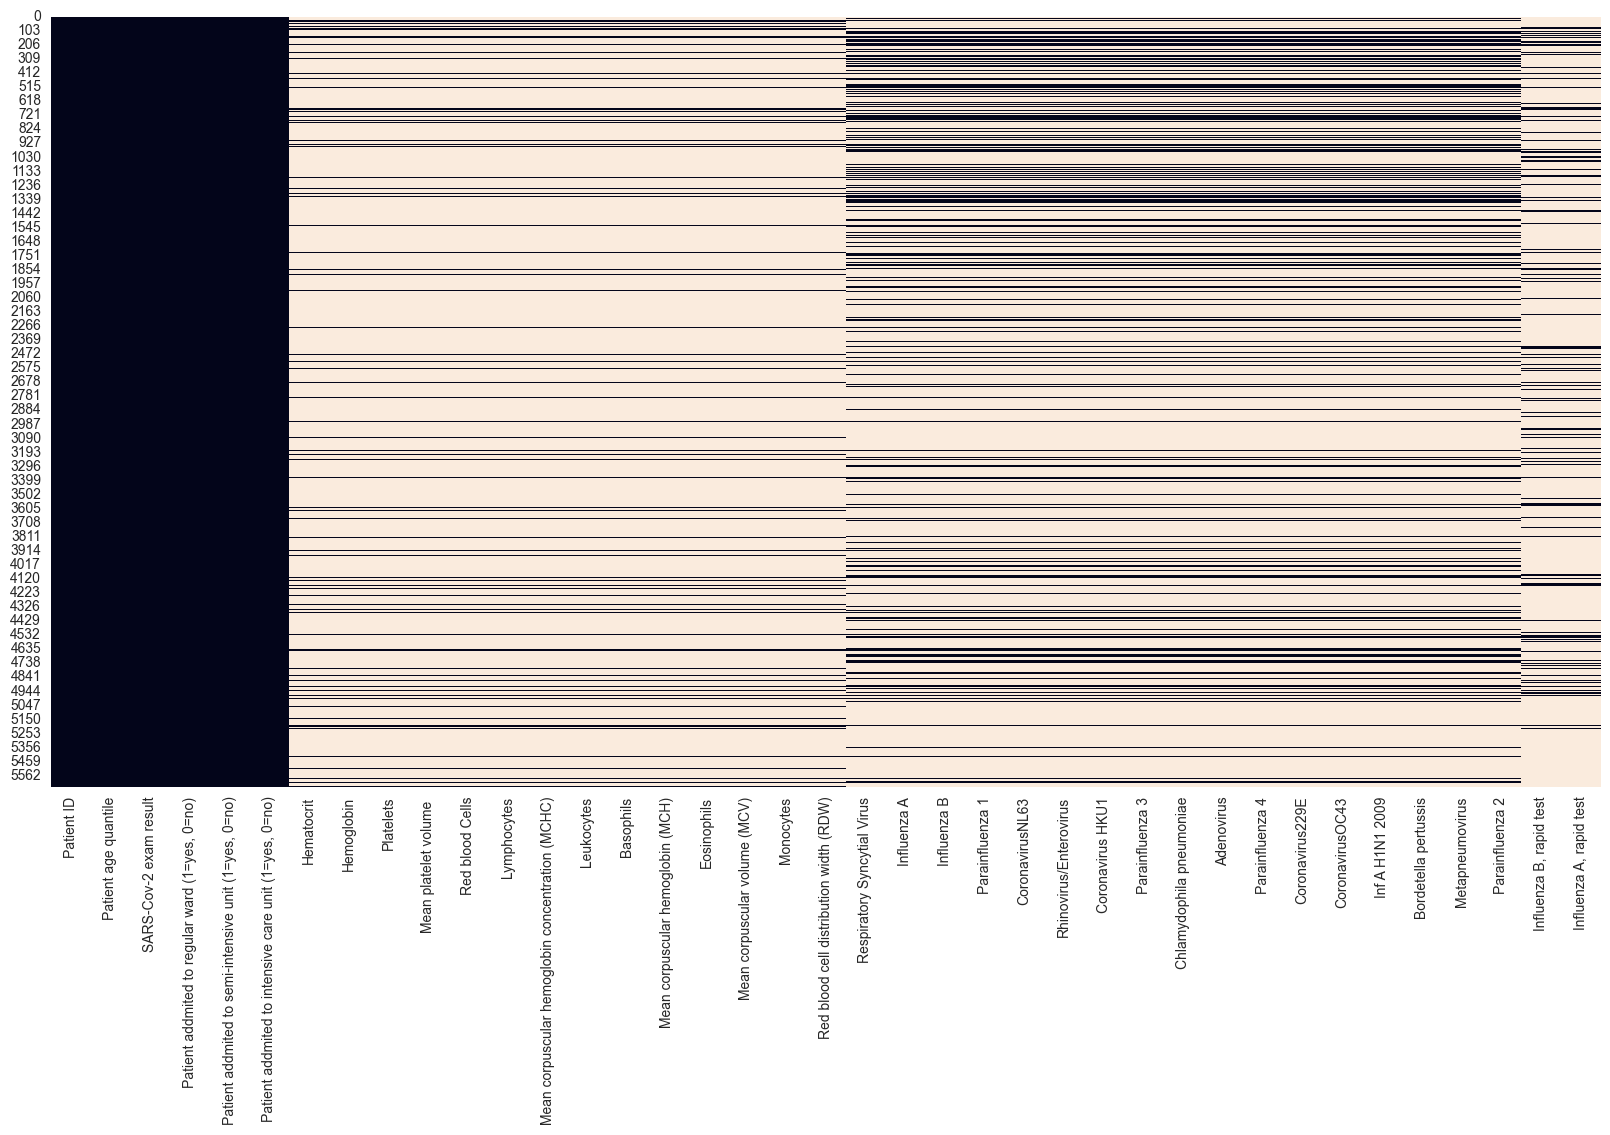

In [10]:
# on affiche une vision globale de notre dataset
plt.figure(figsize=(20, 10))
sns.heatmap(df_covid19.isna(), cbar=False)

Il ne nous reste plus qu'à éliminer la colonne Patient ID, car elle ne nous sert à rien

In [11]:
df_covid19 = df_covid19.drop('Patient ID', axis=1)

## 2. Visualisation de la target

In [12]:
df_covid19['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    5086
positive     558
Name: count, dtype: int64

In [13]:
df_covid19['SARS-Cov-2 exam result'].value_counts(normalize=True)

SARS-Cov-2 exam result
negative    0.901134
positive    0.098866
Name: proportion, dtype: float64

On remarque que nos classes ne sont pas équilibrées.
Donc, il va nous falloir utiliser le score : *F1, la sensibilité ou la precision*

## 3. Comprendre la signification de nos variables

**Histogramme des variables continues afin d'observer la distribution des variables**

C:\Users\luis\AppData\Local\Temp\ipykernel_9056\1758822011.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_covid19[var])
C:\Users\luis\AppData\Local\Temp\ipykernel_9056\1758822011.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_covid19[var])
C:\Users\luis\AppData\Local\Temp\ipykern

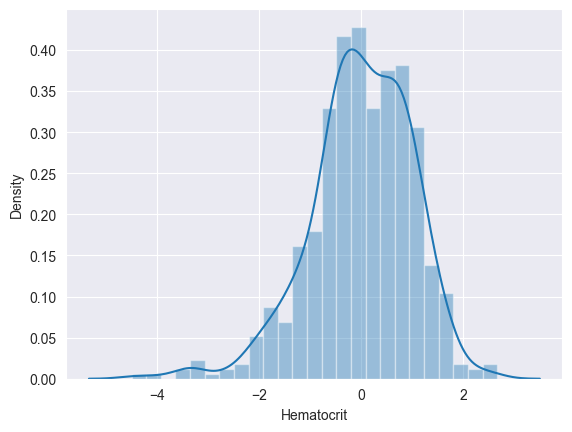

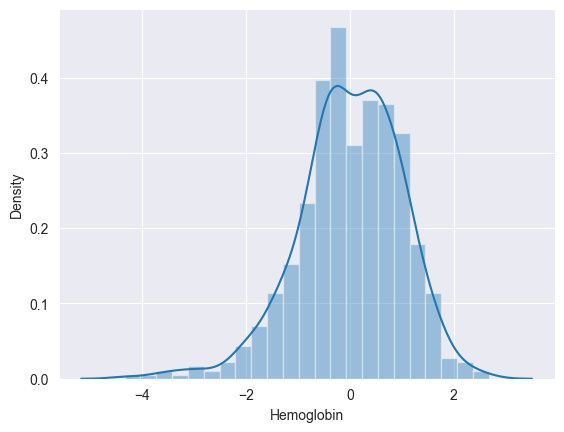

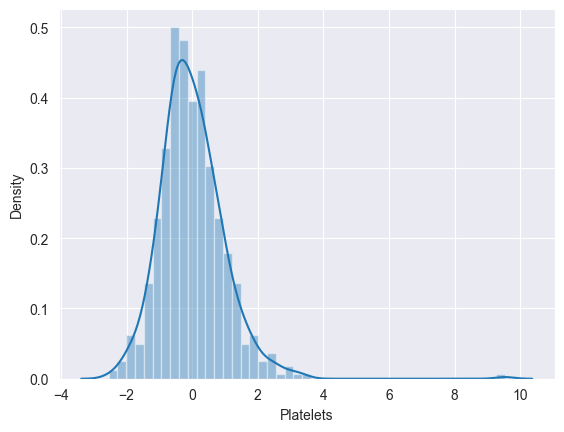

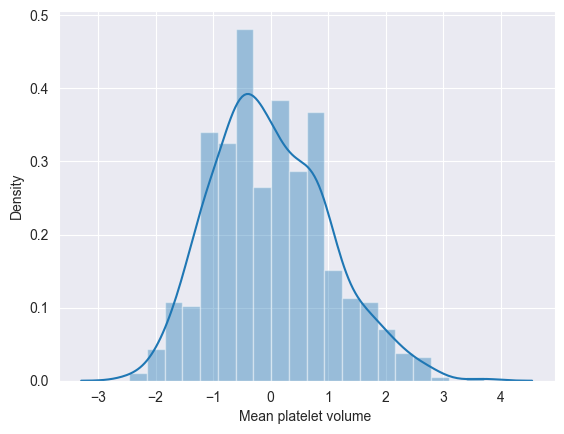

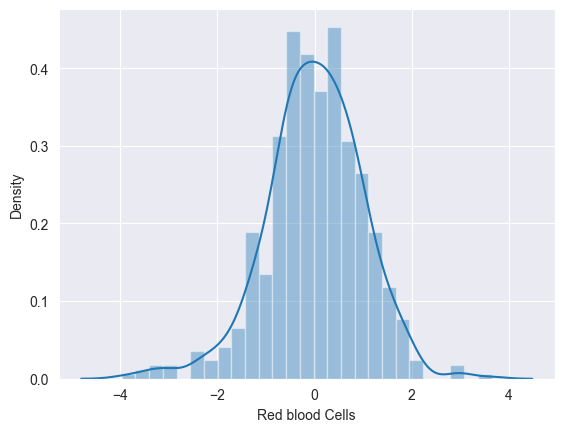

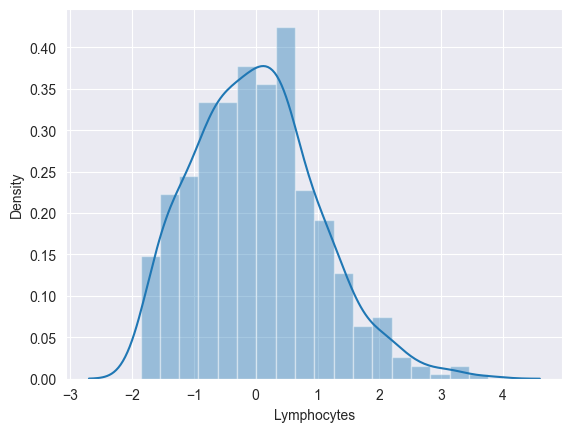

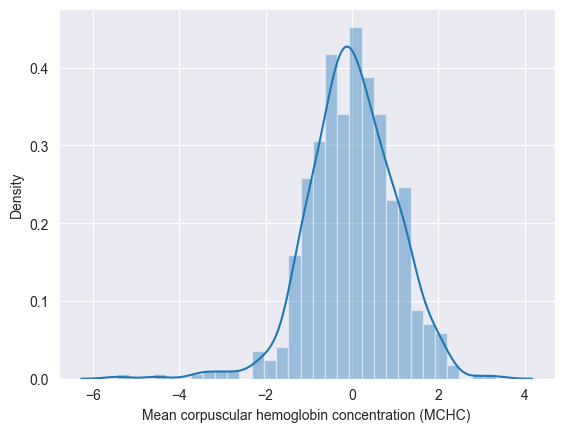

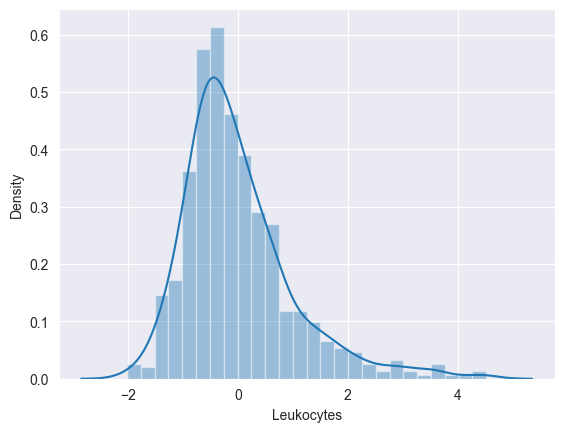

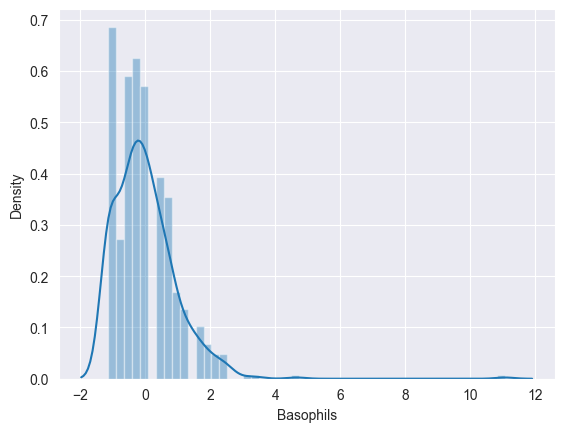

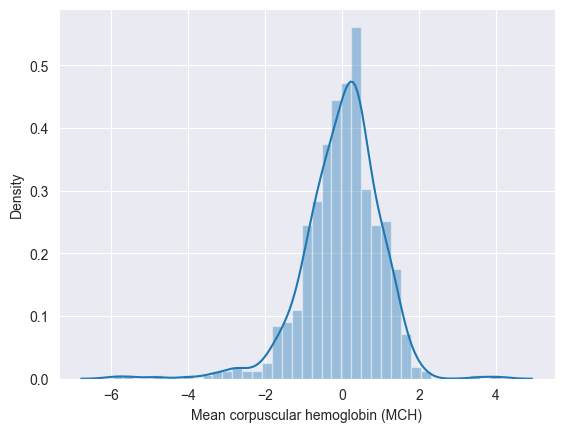

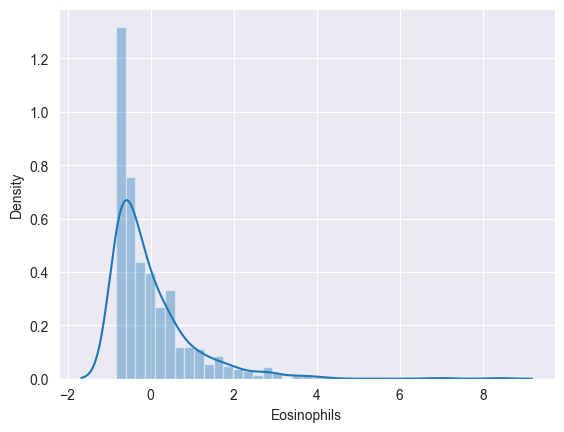

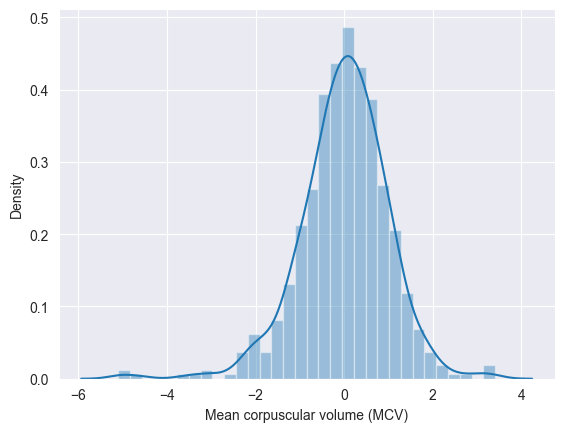

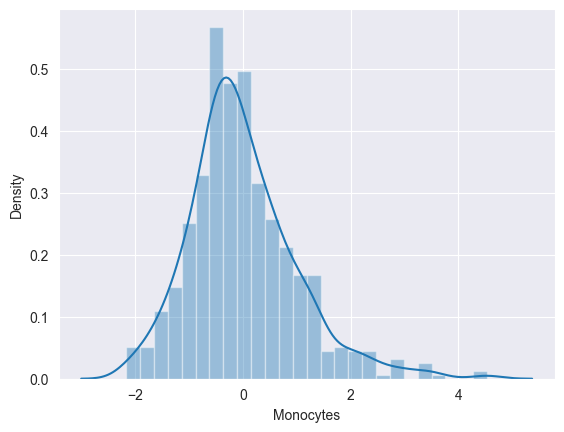

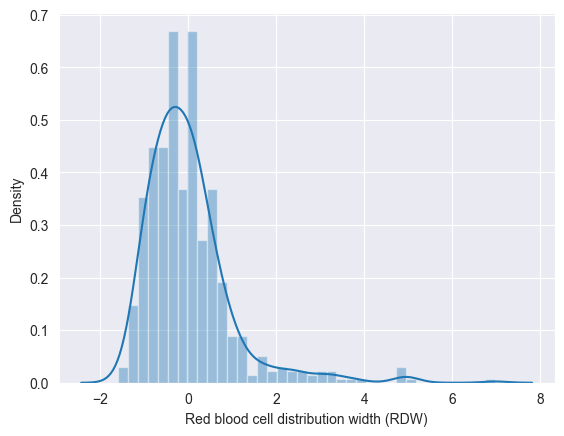

In [14]:
for var in df_covid19.select_dtypes('float'):
    plt.figure()
    sns.distplot(df_covid19[var])

On remarque :
- la majorité est centrée en 0 et on un écart type=1. Donc ce qui nous dit que les données ont déjà été standardisées
- Un bon nombre de ces variables suivent une loi normale, mais pas tous.

**Travaillons sur la variable Age**

C:\Users\luis\AppData\Local\Temp\ipykernel_9056\2058841138.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_covid19['Patient age quantile'])


<Axes: xlabel='Patient age quantile', ylabel='Density'>

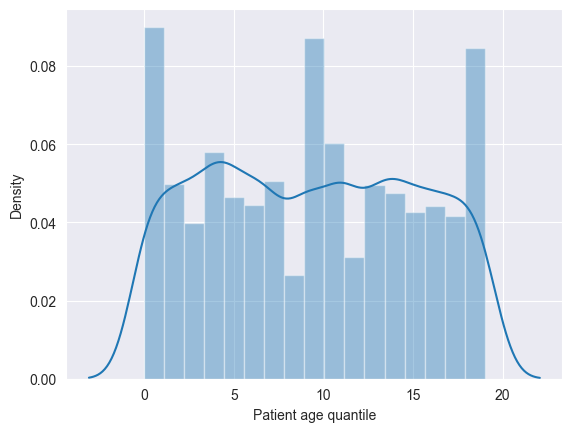

In [15]:
sns.distplot(df_covid19['Patient age quantile'])

Il est difficile d'interpréter ce graphique. Car on ne sert pas ce que signifie age = 0 ou 5 ou 10...
La personne qui a laissé ce dataframe sur Kaggle ne nous a rien dit à propos

**Variable Catégorielles ou qualitatives**

In [16]:
for var in df_covid19.select_dtypes('object'):
    print(f'{var :-<50} {df_covid19[var].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

- Les variables sont de type binaire (0, 1)
- La variable Parainfluenza 2 ne nous servira à rien. Car il a une seule valeur

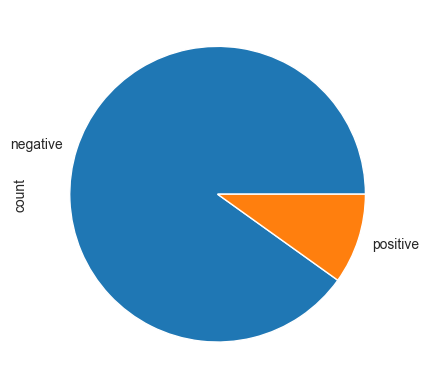

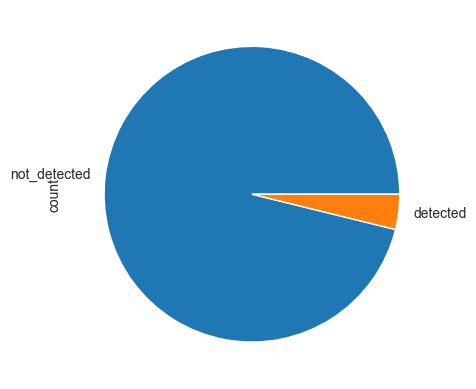

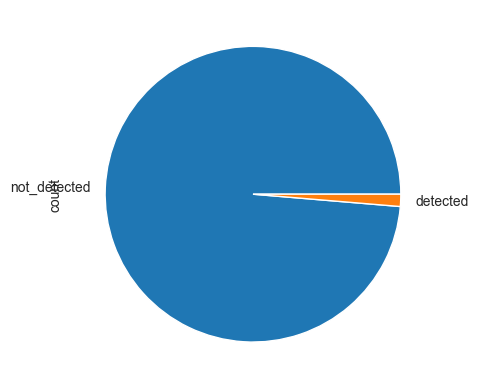

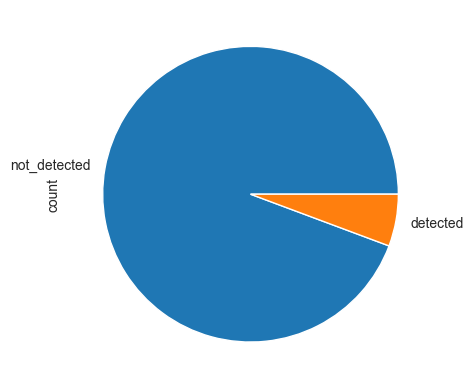

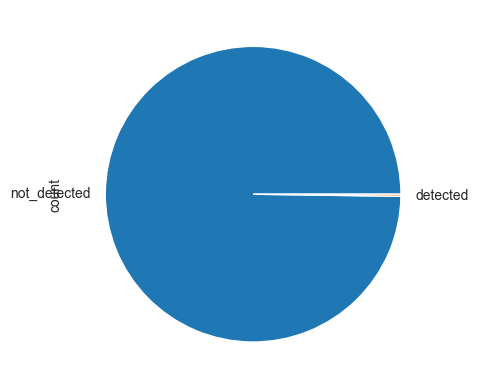

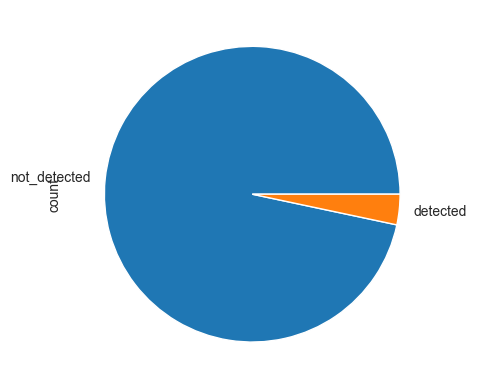

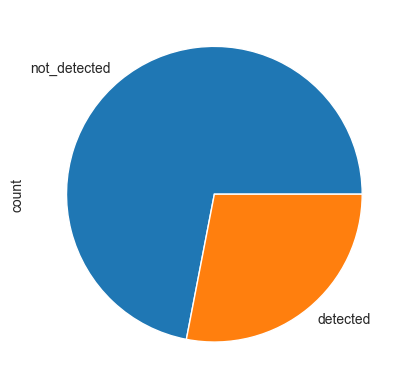

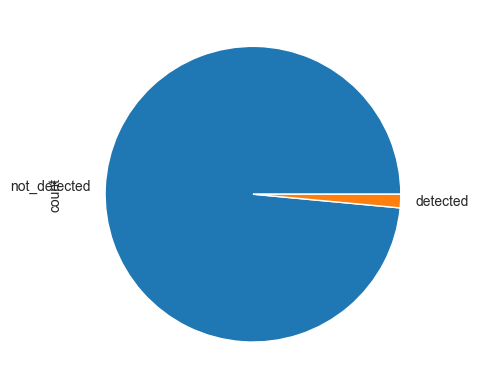

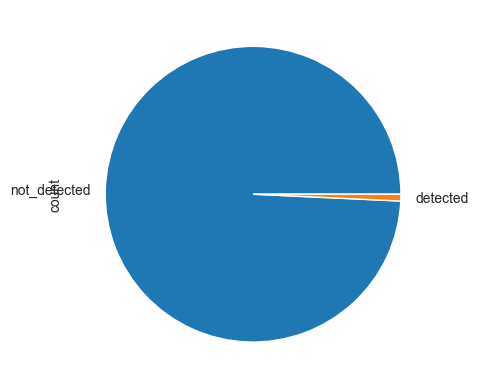

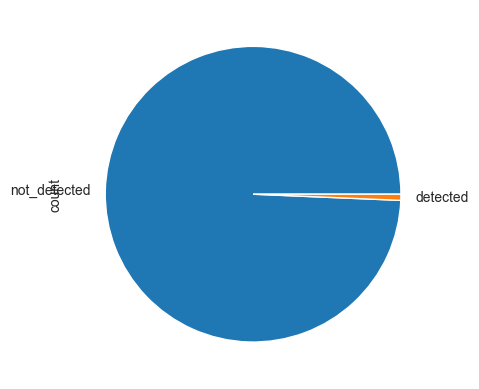

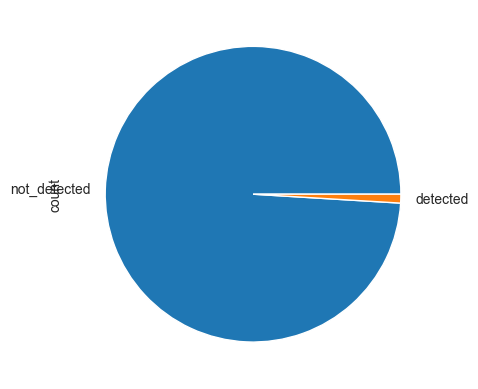

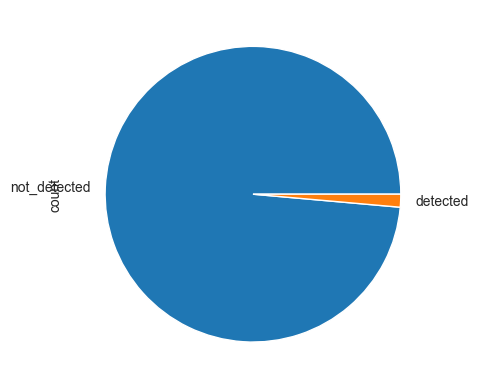

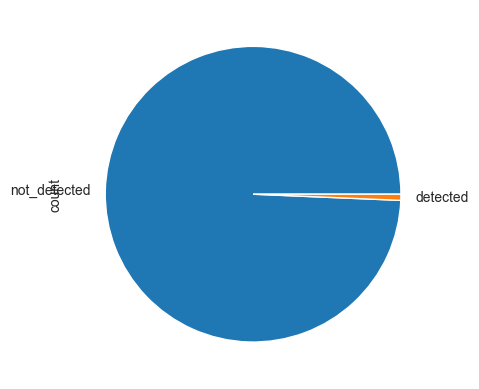

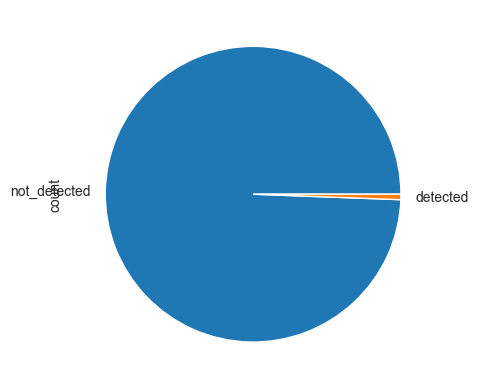

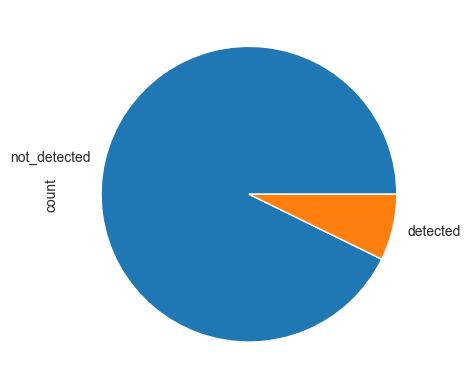

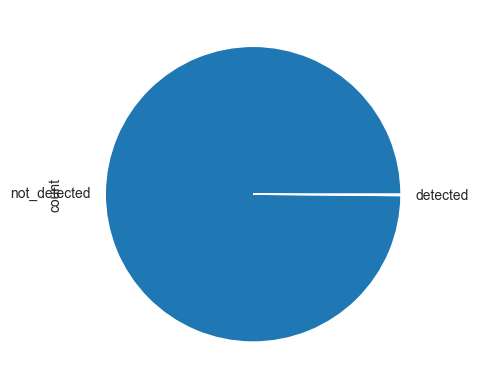

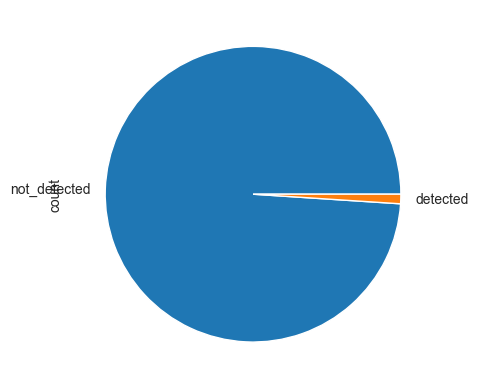

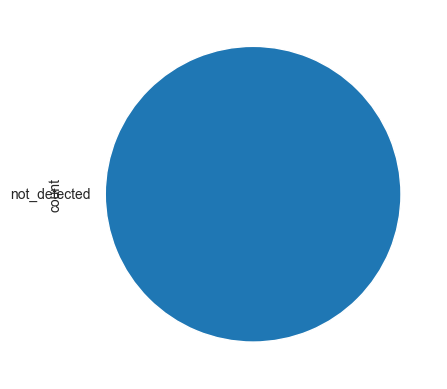

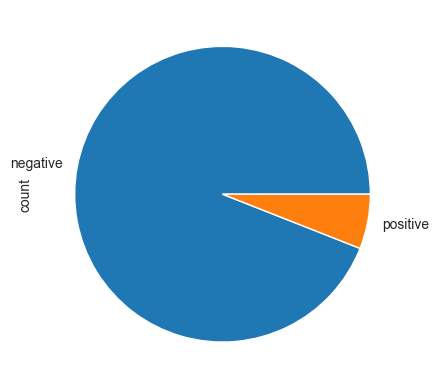

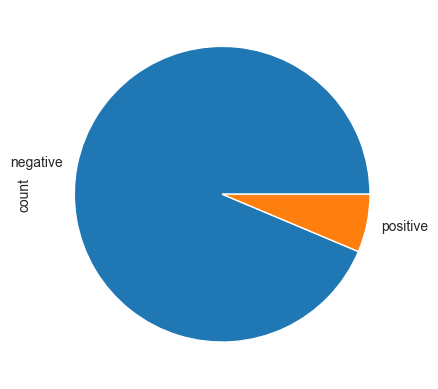

In [17]:
for var in df_covid19.select_dtypes('object'):
    plt.figure()
    df_covid19[var].value_counts().plot.pie()

La majorité des variables ont plus de donnée qualitative not_detected mais la variable Rhinovirus/Enterovirus qui semble différent

# Relation Target /Variables

#### Création de sous ensembles positifs et négatifs

In [18]:
positive_df = df_covid19[df_covid19['SARS-Cov-2 exam result'] == 'positive']
positive_df

Patient age quantile SARS-Cov-2 exam result  \
67                       7               positive   
284                     16               positive   
513                     10               positive   
568                      2               positive   
676                     15               positive   
...                    ...                    ...   
5632                    16               positive   
5633                     4               positive   
5634                    15               positive   
5639                     3               positive   
5643                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
67                                                 0   
284                                                1   
513                                                0   
568                                                0   
676                                                0   
...                                              ...   
5632                                               0   
5633                                               0   
5634                                               0   
5639                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
67                                                    0       
284                                                   0       
513                                                   0       
568                                                   0       
676                                                   0       
...                                                 ...       
5632                                                  0       
5633                                                  0       
5634                                                  0       
5639                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
67                                                    0             NaN   
284                                                   0             NaN   
513                                                   0             NaN   
568                                                   0        0.991838   
676                                                   0             NaN   
...                                                 ...             ...   
5632                                                  0             NaN   
5633                                                  0             NaN   
5634                                                  0             NaN   
5639                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
67           NaN        NaN                    NaN              NaN  ...   
284          NaN        NaN                    NaN              NaN  ...   
513          NaN        NaN                    NaN              NaN  ...   
568     0.792188  -0.341548               1.469188         1.653476  ...   
676          NaN        NaN                    NaN              NaN  ...   
...          ...        ...                    ...              ...  ...   
5632         NaN        NaN                    NaN              NaN  ...   
5633         NaN        NaN                    NaN              NaN  ...   
5634         NaN        NaN                    NaN              NaN  ...   
5639         NaN        NaN                    NaN              NaN  ...   
5643    0.541564  -0.906829              -0.325903         0.578024  ...   

        Adenovirus  Parainfluenza 4  Coronavirus229E  CoronavirusOC43  \
67             NaN              NaN              NaN

In [19]:
negative_df = df_covid19[df_covid19['SARS-Cov-2 exam result'] == 'negative']
negative_df

Patient age quantile SARS-Cov-2 exam result  \
0                       13               negative   
1                       17               negative   
2                        8               negative   
3                        5               negative   
4                       15               negative   
...                    ...                    ...   
5637                    12               negative   
5638                    14               negative   
5640                    17               negative   
5641                     4               negative   
5642                    10               negative   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5637                                               0   
5638                                               0   
5640                                               0   
5641                                               0   
5642                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5637                                                  0       
5638                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5637                                                  0             NaN   
5638                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0            NaN        NaN                    NaN              NaN  ...   
1       -0.02234  -0.517413               0.010677         0.102004  ...   
2            NaN        NaN                    NaN              NaN  ...   
3            NaN        NaN                    NaN              NaN  ...   
4            NaN        NaN                    NaN              NaN  ...   
...          ...        ...                    ...              ...  ...   
5637         NaN        NaN                    NaN              NaN  ...   
5638         NaN        NaN                    NaN              NaN  ...   
5640         NaN        NaN                    NaN              NaN  ...   
5641         NaN        NaN                    NaN              NaN  ...   
5642         NaN        NaN                    NaN              NaN  ...   

        Adenovirus  Parainfluenza 4  Coronavirus229E  CoronavirusOC43  \
0              NaN              NaN              NaN

#### Création des sous ensemble Blood et Viral

In [20]:
missing_rate = df_covid19.isna().sum()/df_covid19.shape[0]

# on stocke les colonnes du dataset correspondant à Blood
blood_columns = df_covid19.columns[(missing_rate < 0.9) & (missing_rate > 0.88)]
# on stocke les colonnes du dataset correspondant à Viral
viral_columns = df_covid19.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

**Visualisons la relation Target Blood**

C:\Users\luis\AppData\Local\Temp\ipykernel_9056\607165748.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label='positive')
C:\Users\luis\AppData\Local\Temp\ipykernel_9056\607165748.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], label='negative')
C:\U

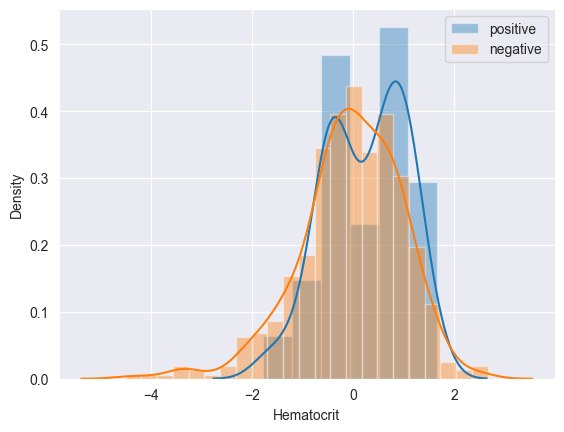

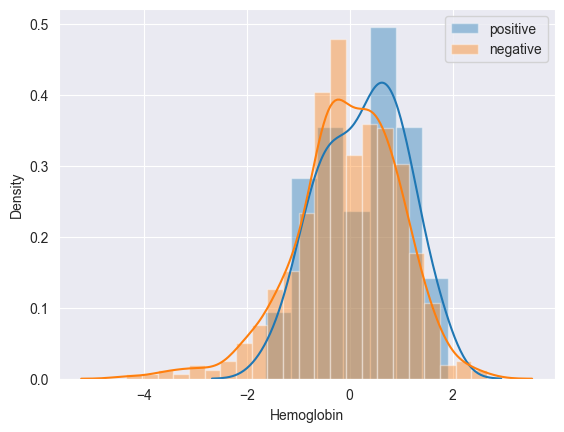

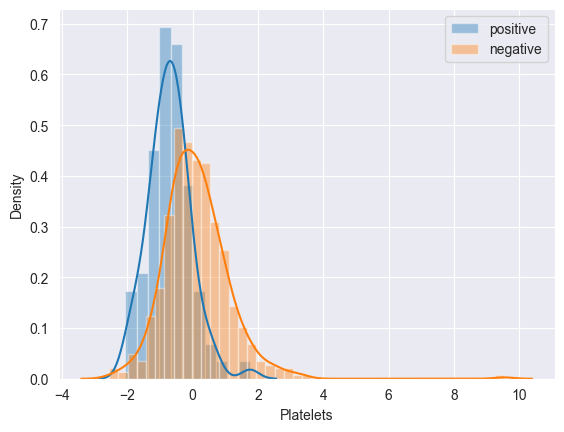

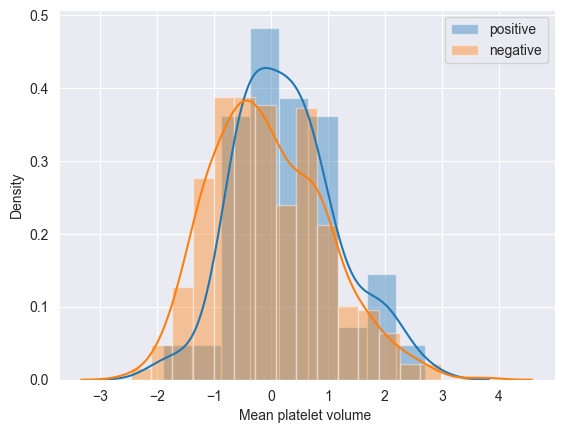

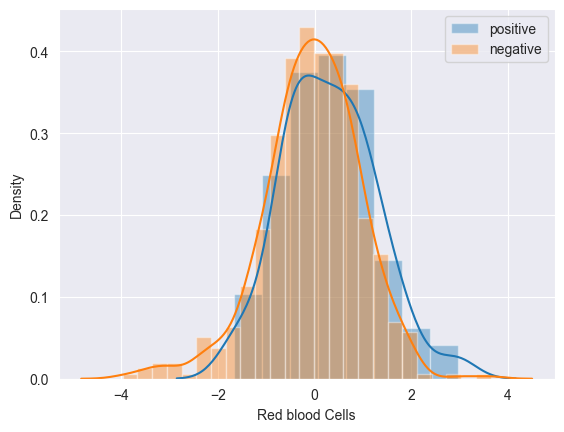

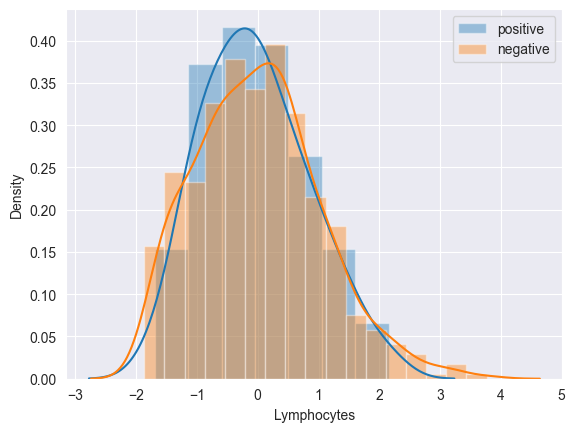

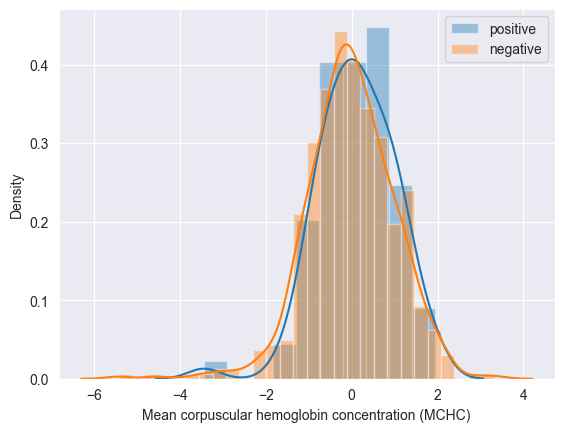

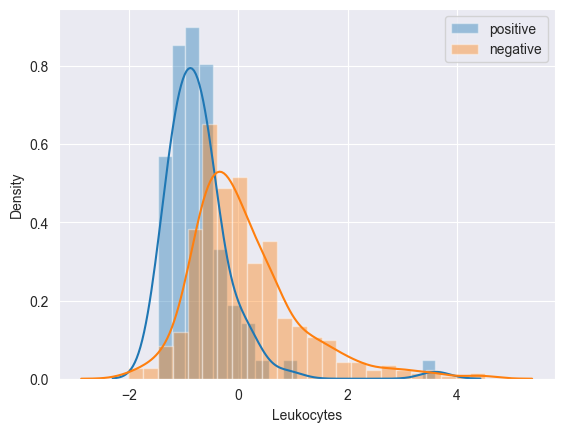

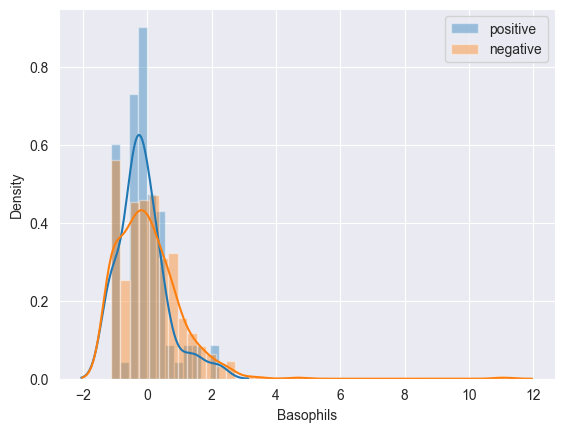

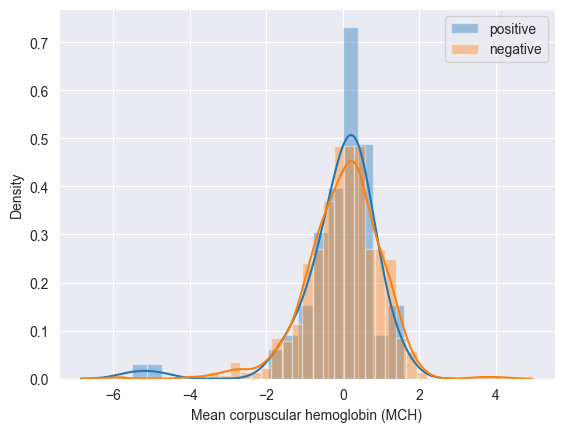

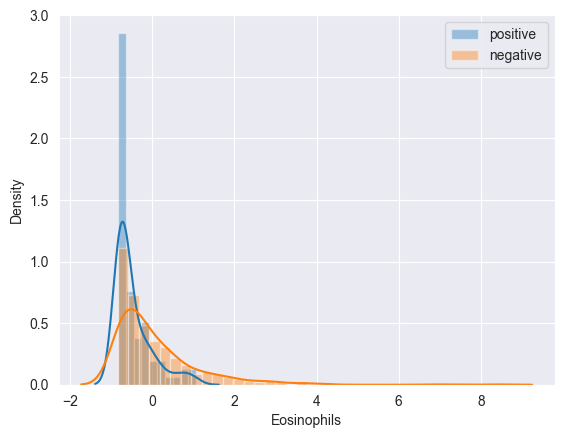

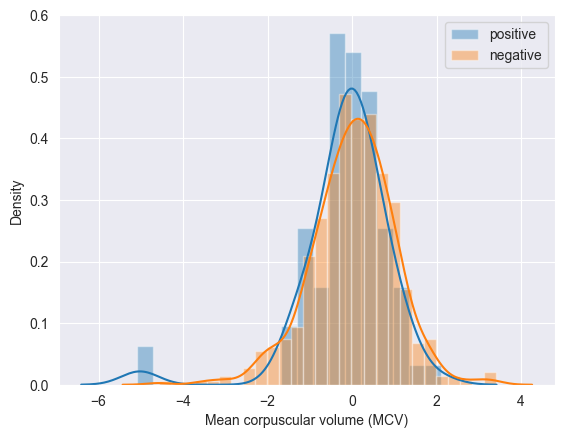

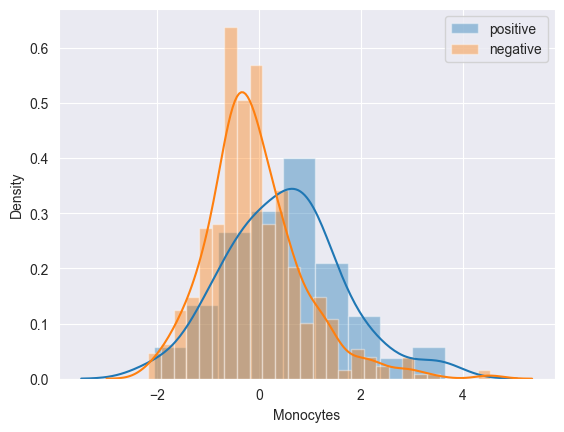

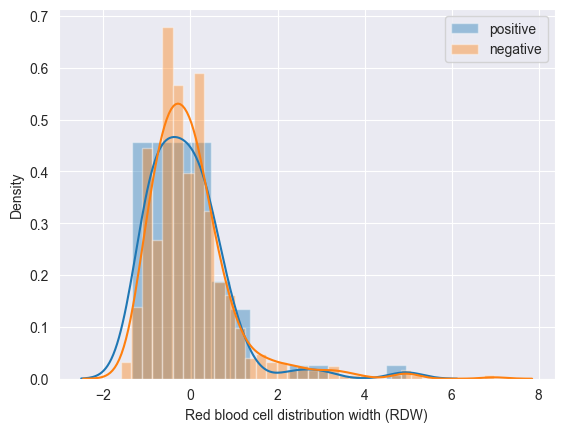

In [21]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

On peut écrire cette hypothèse :
- Il semble que le taux de
    - Platelets,
    - Monocytes,
    - Leucocytes
soient liés aux Covid 19

**Relation Target / Age quantile**

<Axes: xlabel='Patient age quantile', ylabel='count'>

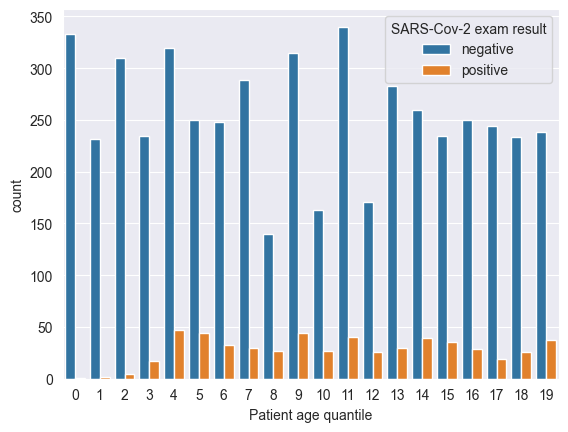

In [22]:
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df_covid19)

Les individus faibles sont très peu contaminés. Cependant, nous n'avons toujours pas un détail clair.

**Relation Target / Viral** : données qualitatives

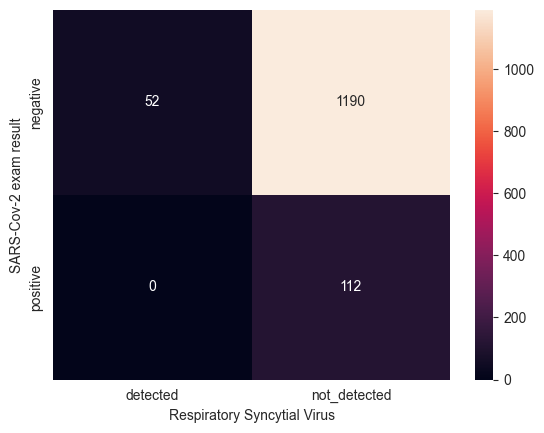

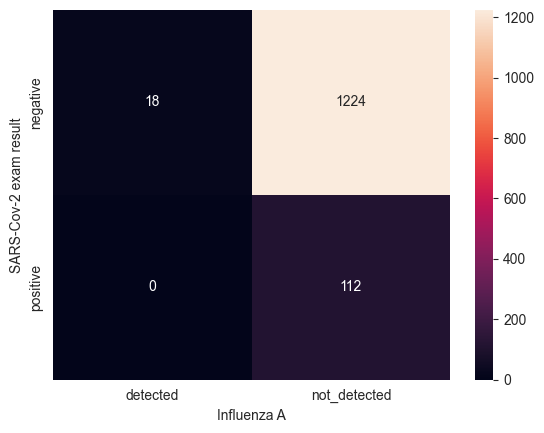

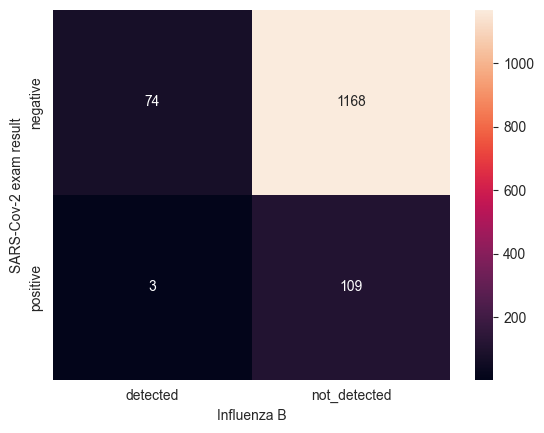

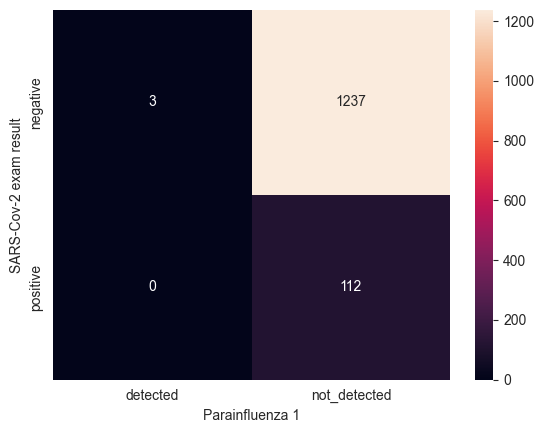

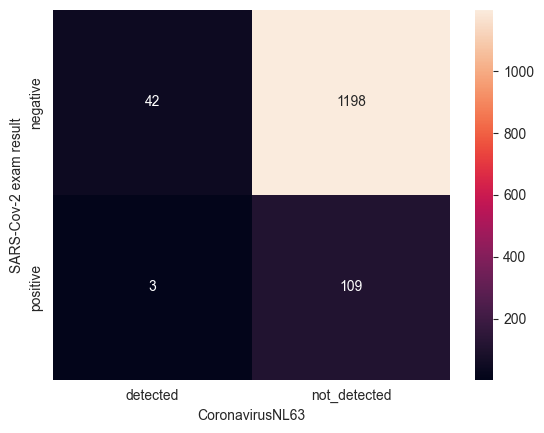

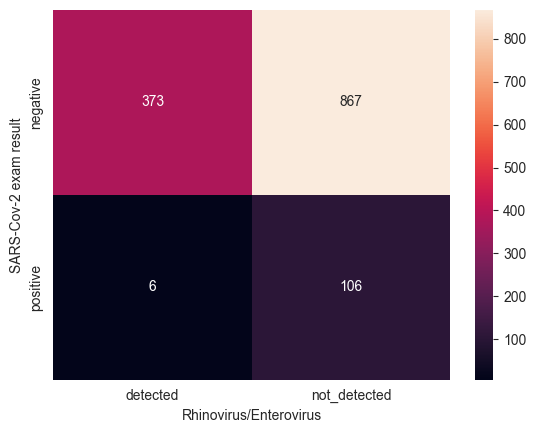

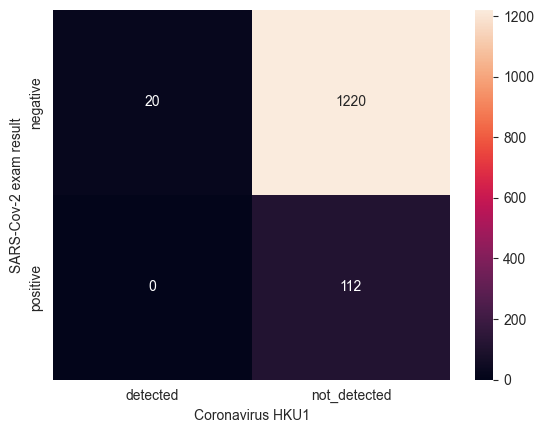

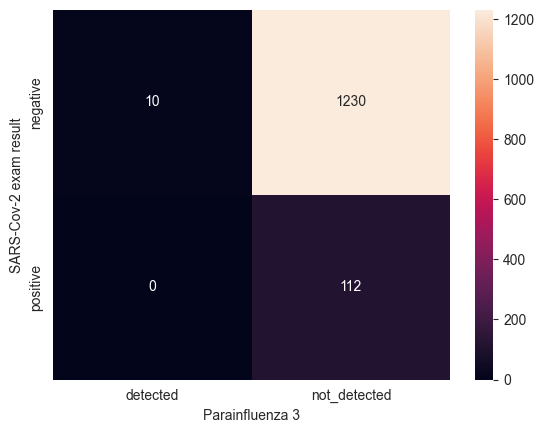

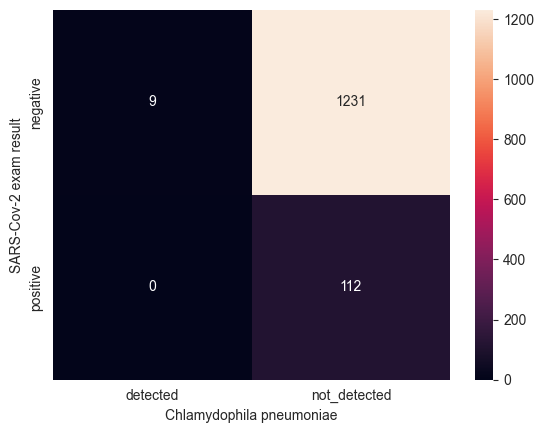

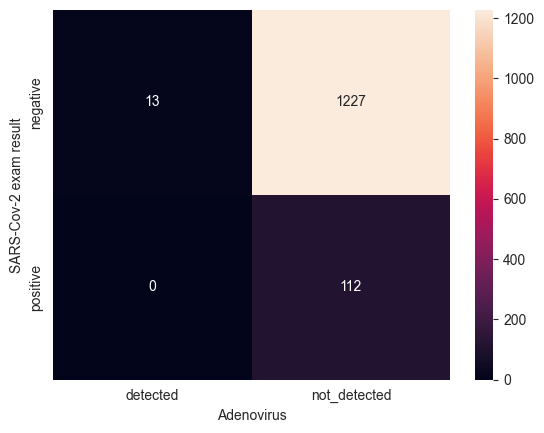

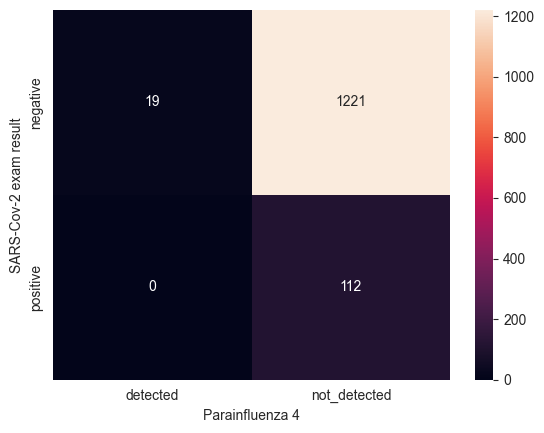

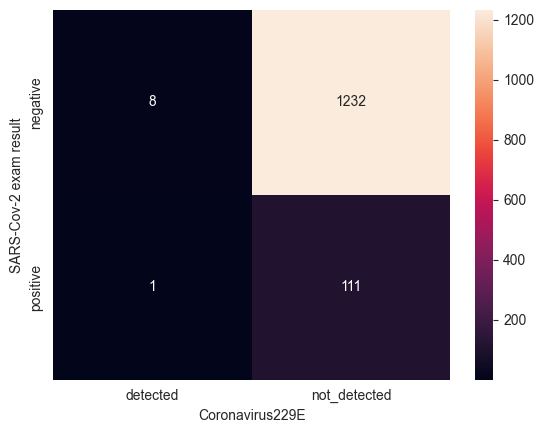

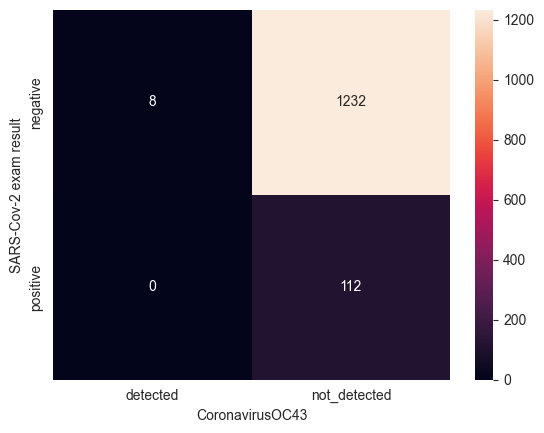

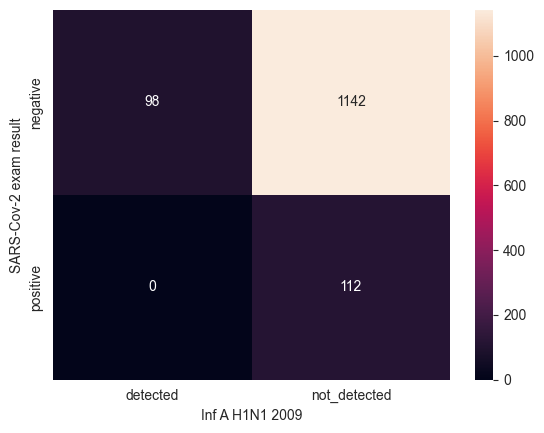

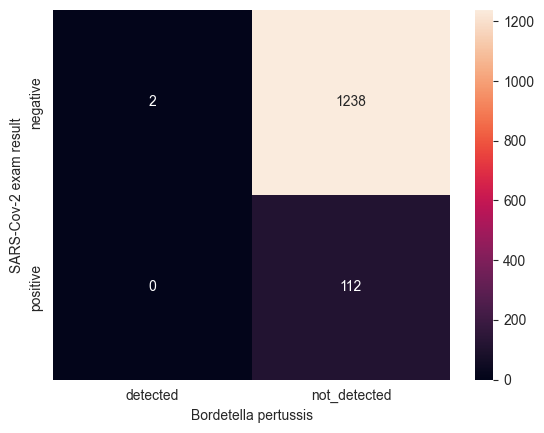

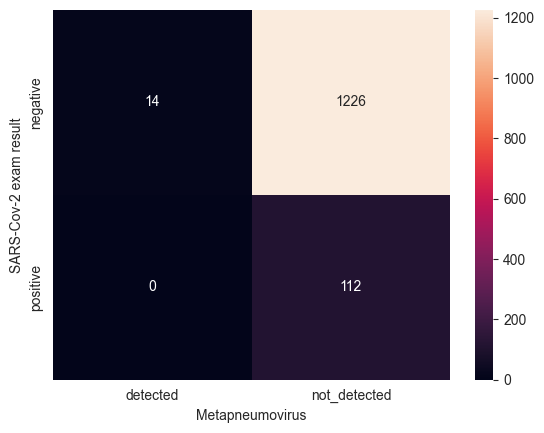

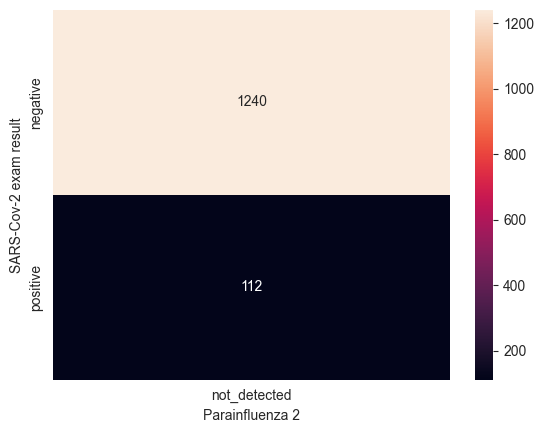

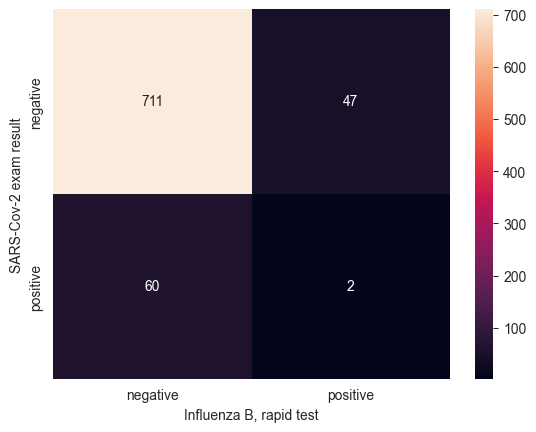

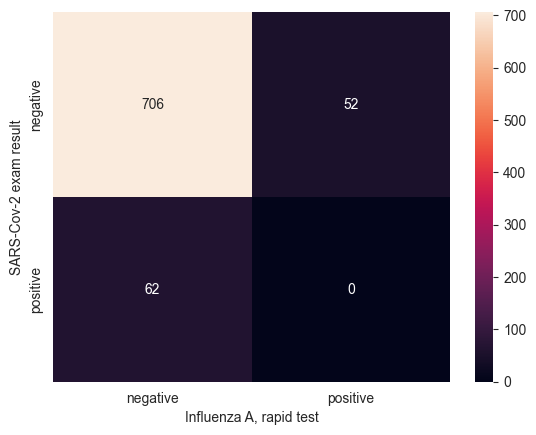

In [23]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df_covid19['SARS-Cov-2 exam result'], df_covid19[col]), annot=True, fmt='d')

Les doubles maladies sont très rares. Rhinovirus/Entérovirus positif - Covid-19 négatif ? → hypothèse à tester ? mais il est possible que la région ait subie une épidémie de ce virus. De plus on peut bien avoir 2 virus en même temps. Tout ça n'a aucun lien avec le coronaVirus

# ANALYSE DES DONNEES AVANCÉES

### Relation variable / Variable

**Relation Taux sanguin**

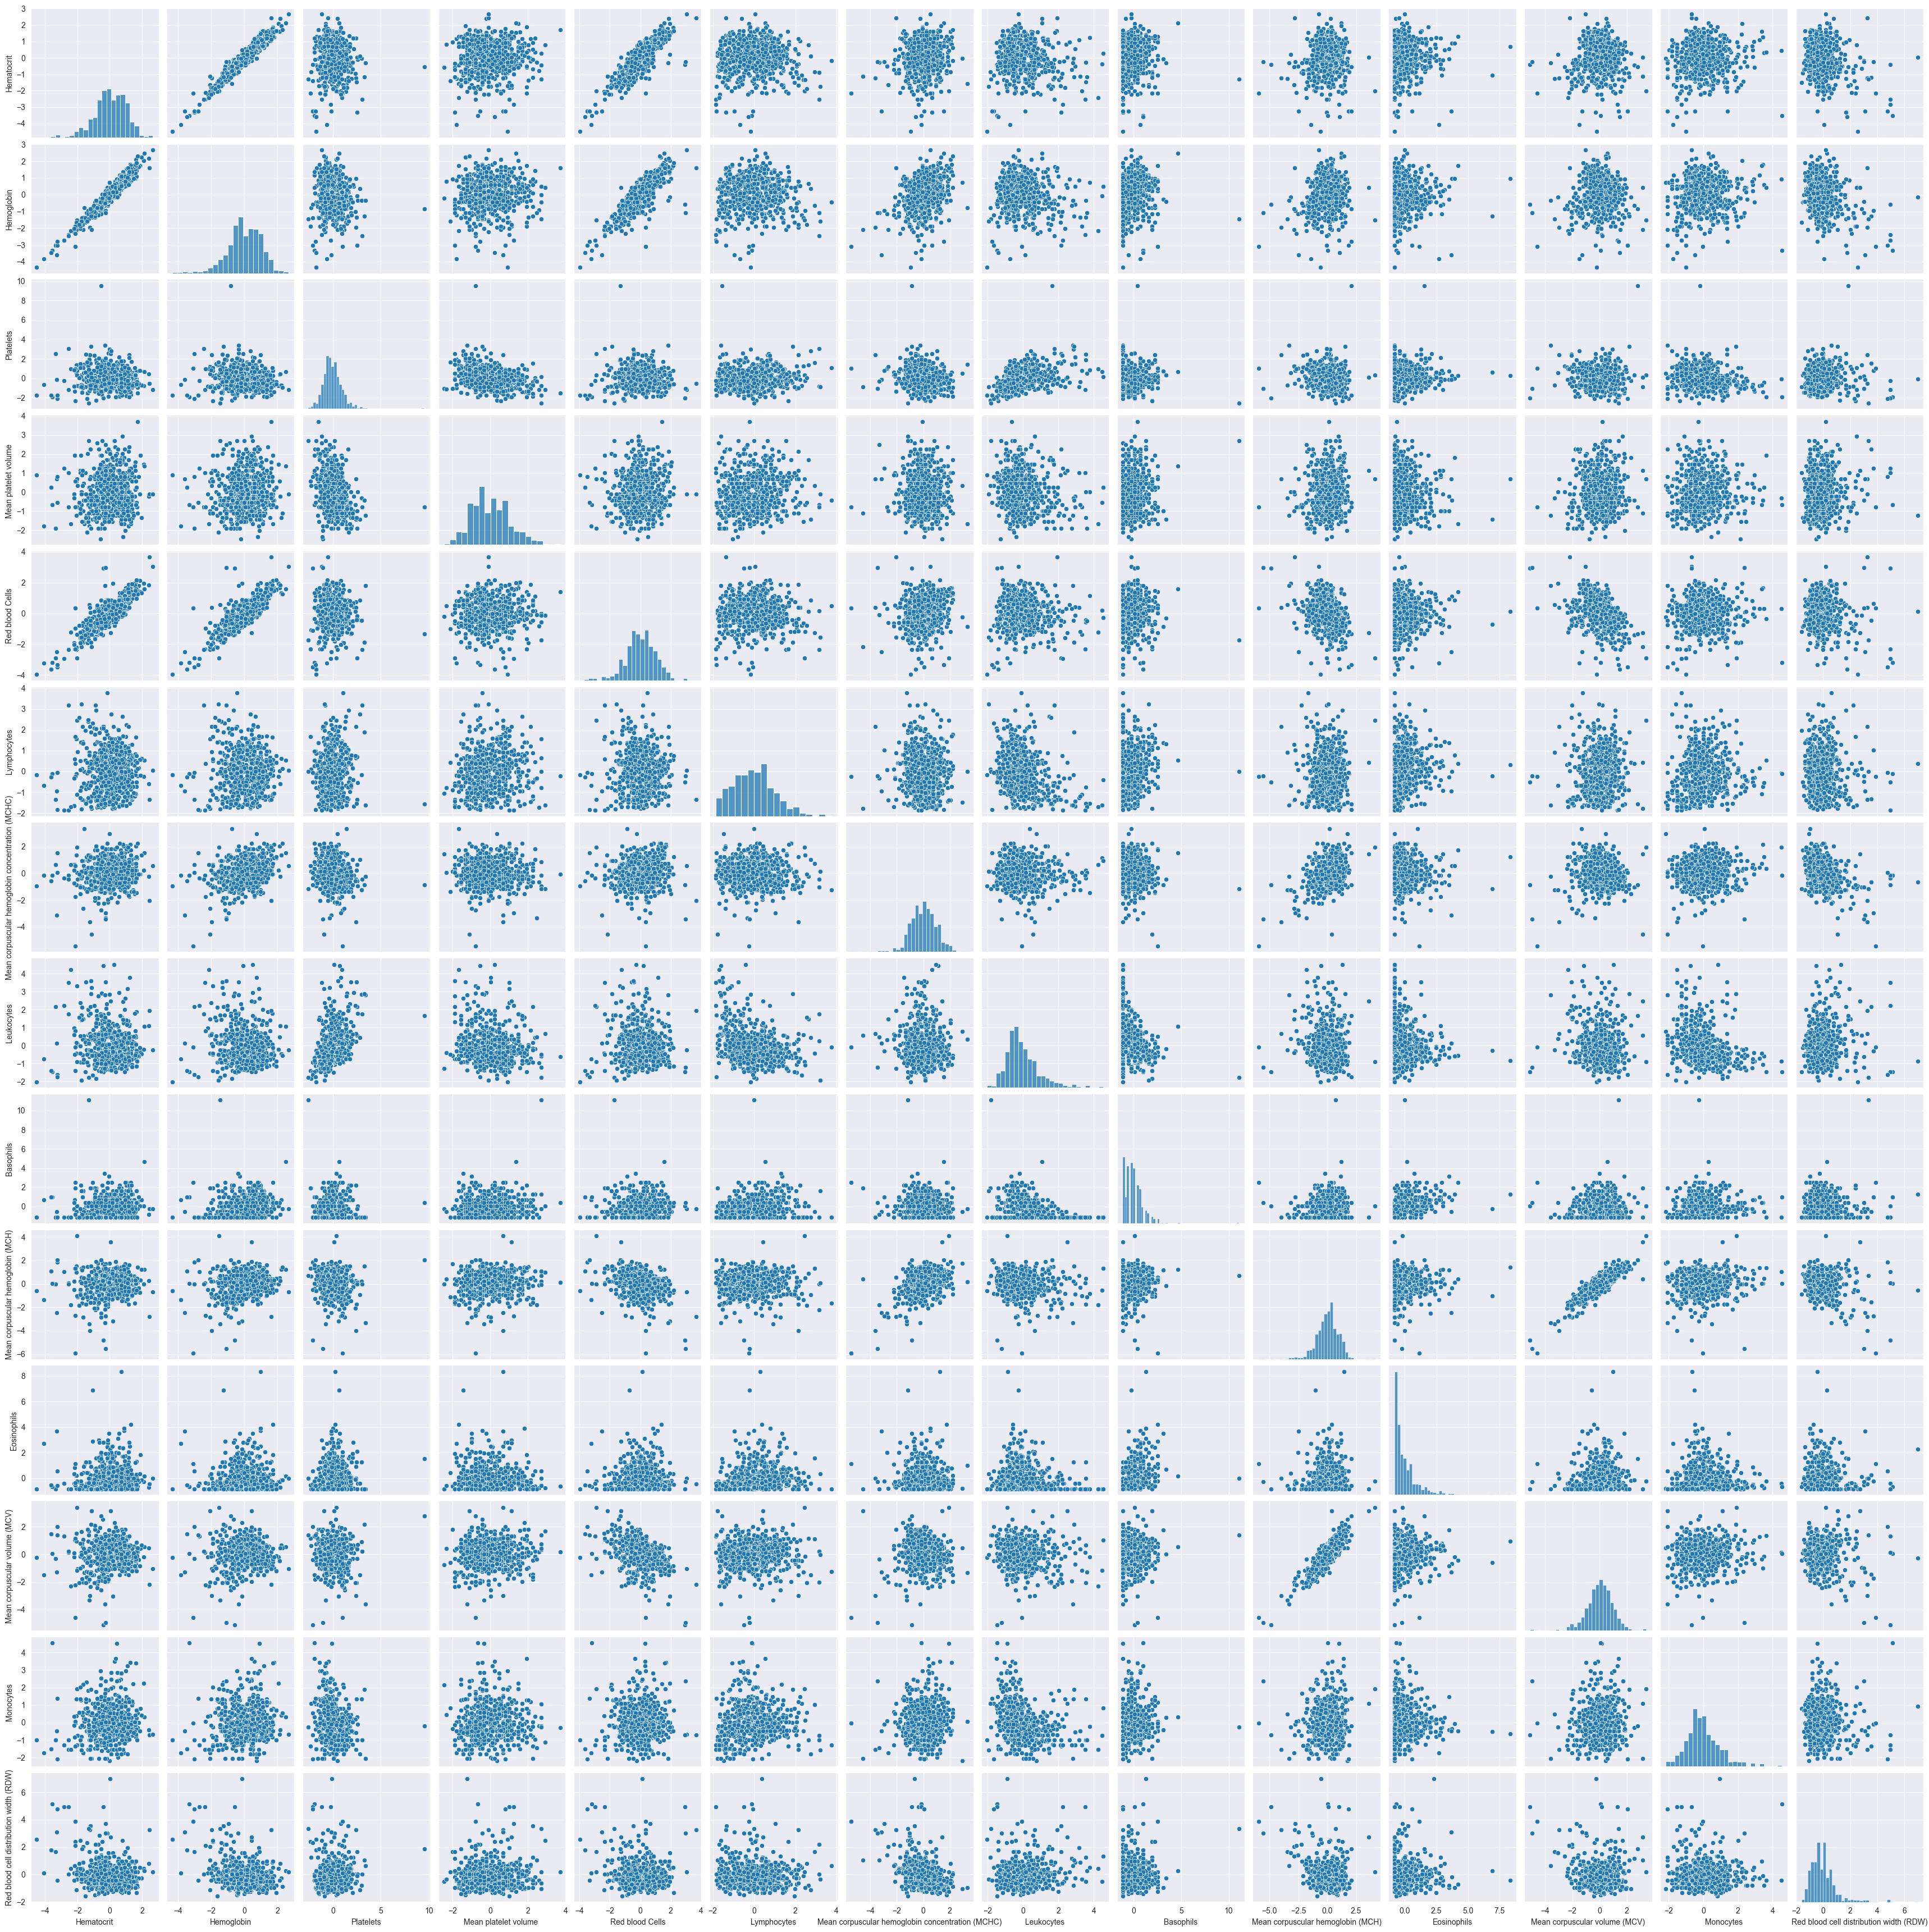

In [24]:
sns.pairplot(df_covid19[blood_columns])

On visualise alors certaines variables qui sont corrélées entre elles ici prenons un exemple :
- Hematocrit et Hemoglobin qui sont fortement corrélées
- etc

***On peut aussi visualiser la corrélation avec ça :***

<Axes: >

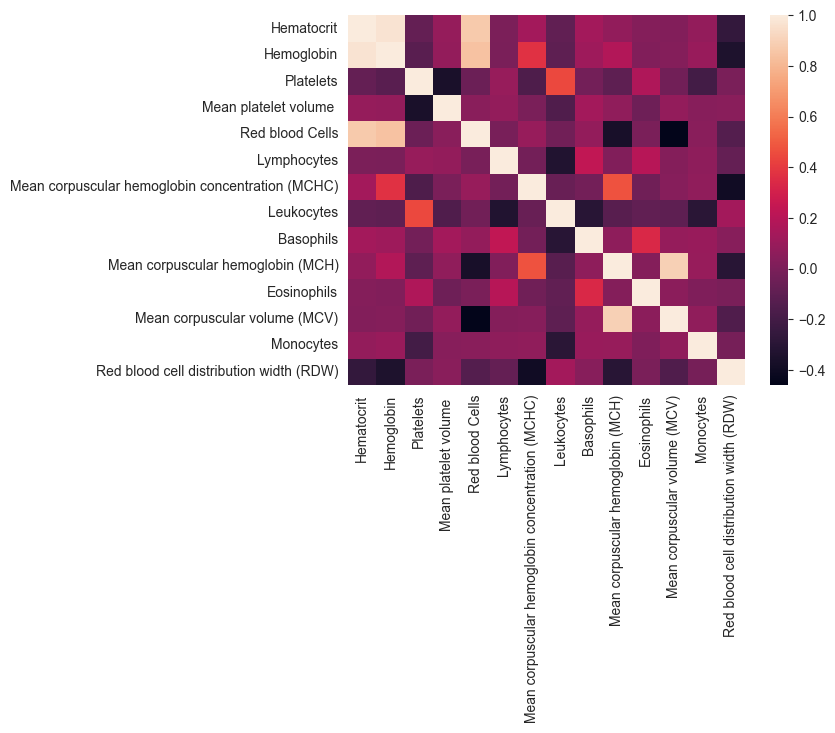

In [25]:
#
sns.heatmap(df_covid19[blood_columns].corr())

On voit aussi la corrélation entre par exemple : 'Hematocrit' et 'Hemoglobin'

***On a aussi ça pour visualiser***

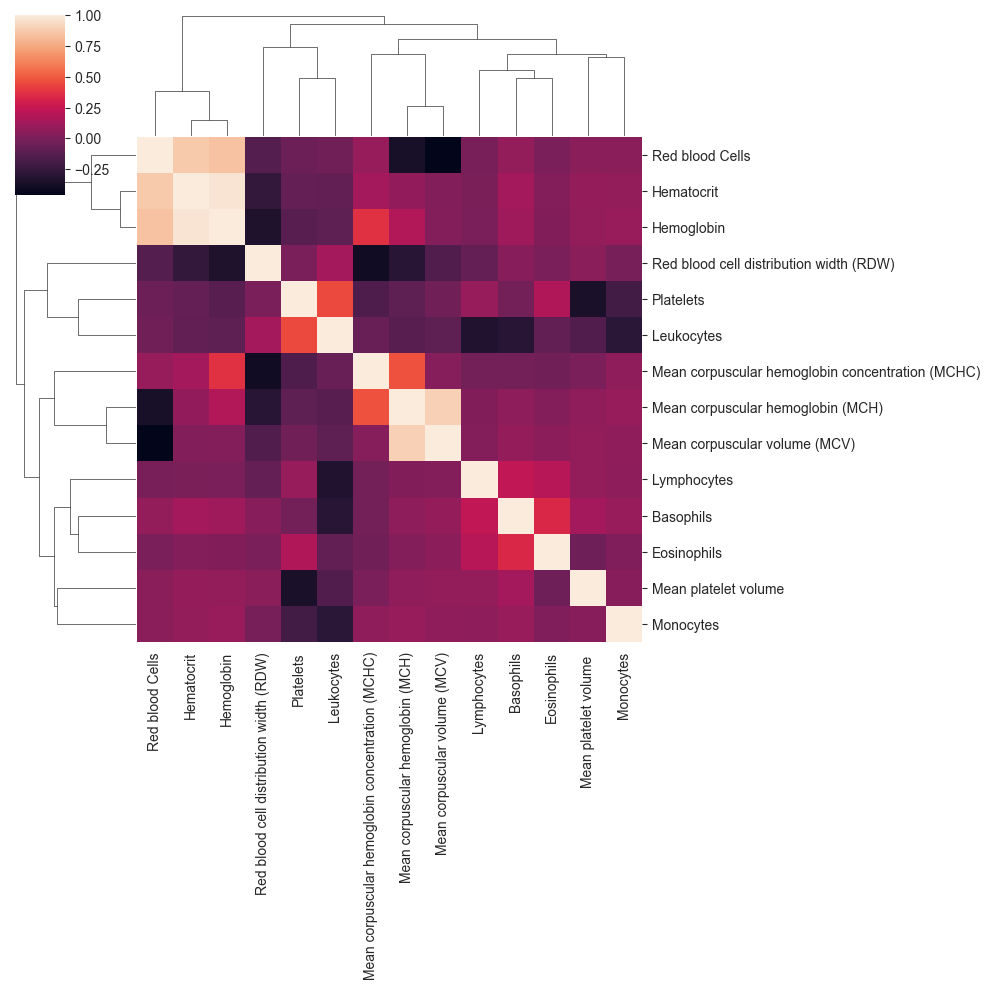

In [26]:
sns.clustermap(df_covid19[blood_columns].corr())

### Relation Variable blood_data / Age

**Affichons la courbe regression pour chaque variable de blood en rapport avec l'age. En prenant pour discrimination si l'individu est positif ou négatif**

C:\Users\luis\AppData\Local\Temp\ipykernel_9056\2198069010.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

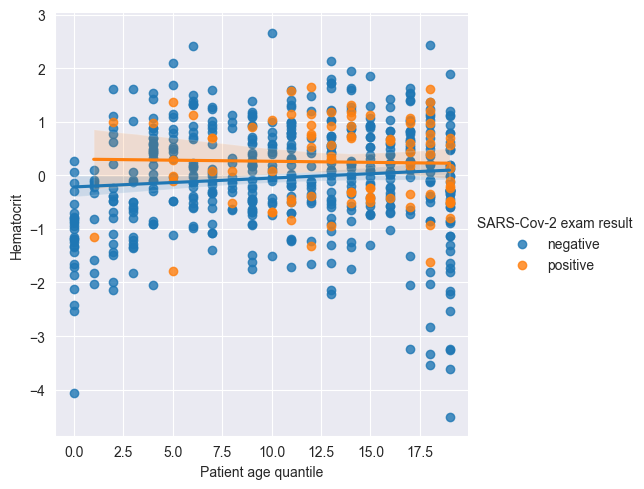

<Figure size 640x480 with 0 Axes>

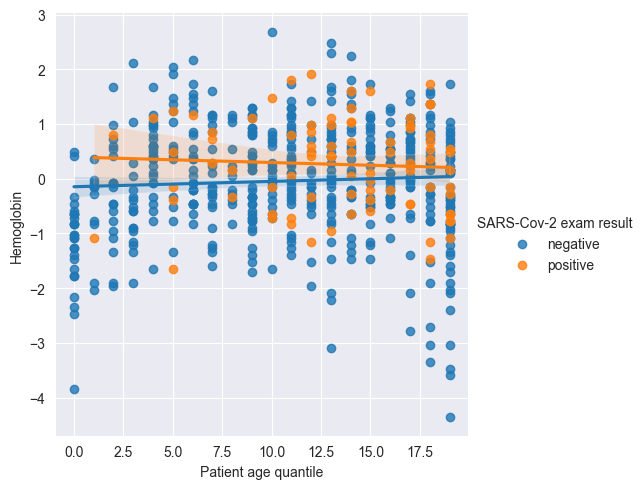

<Figure size 640x480 with 0 Axes>

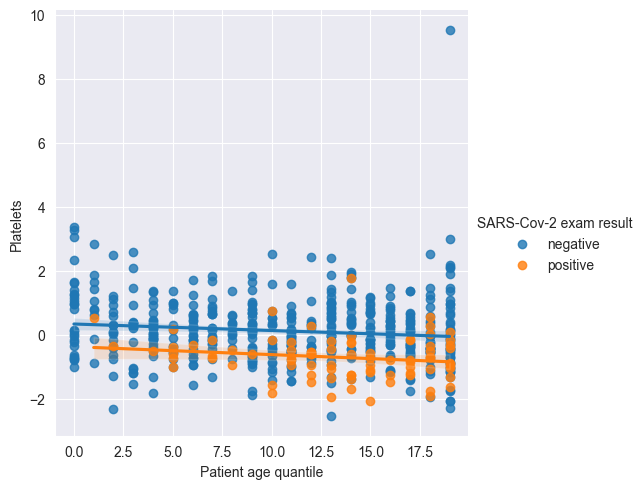

<Figure size 640x480 with 0 Axes>

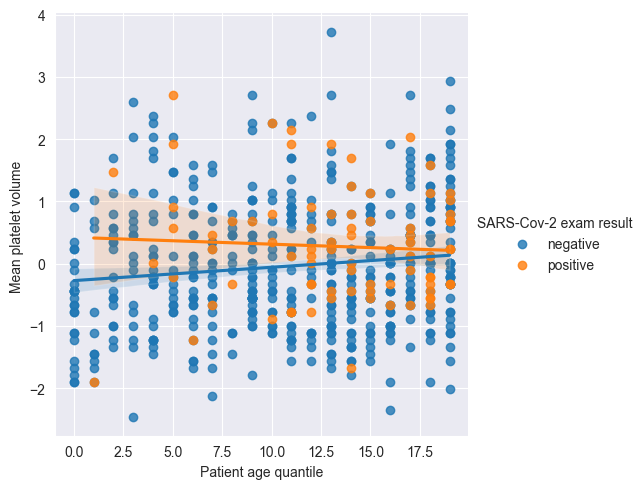

<Figure size 640x480 with 0 Axes>

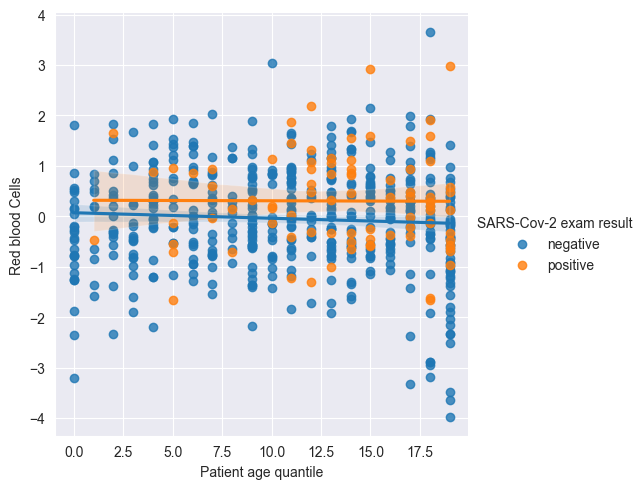

<Figure size 640x480 with 0 Axes>

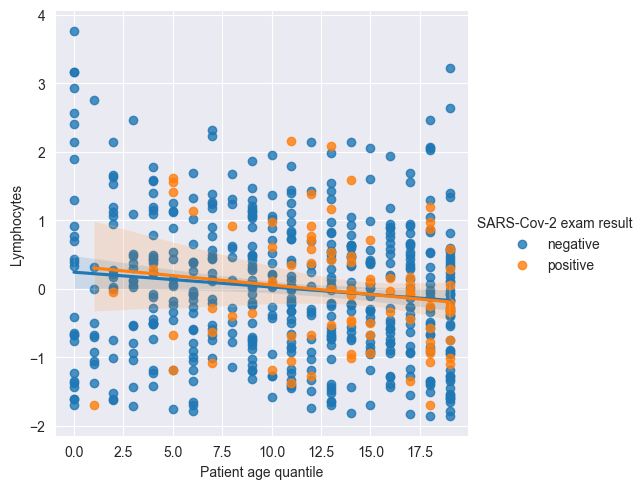

<Figure size 640x480 with 0 Axes>

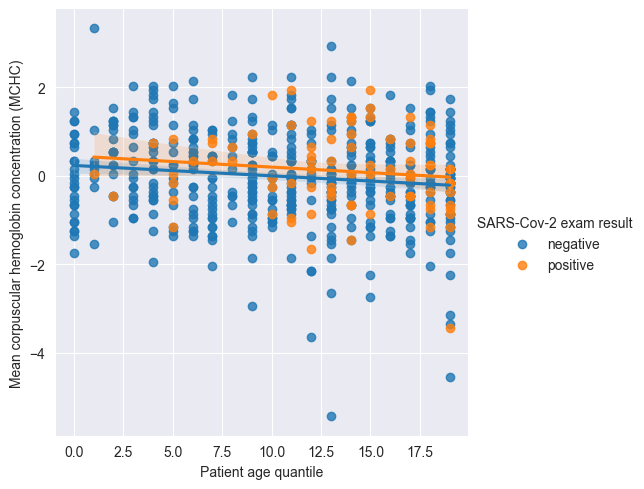

<Figure size 640x480 with 0 Axes>

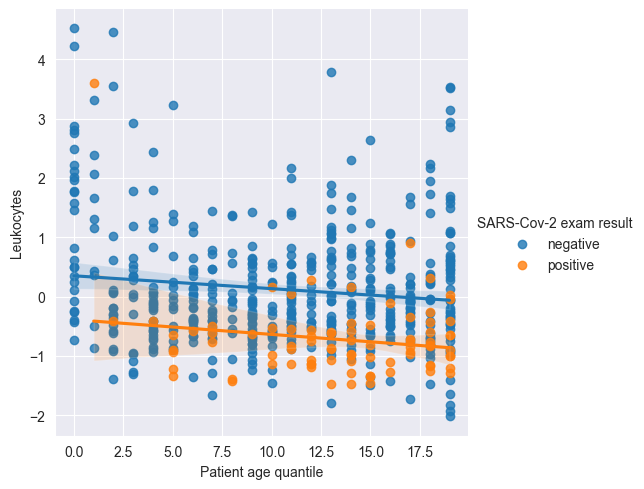

<Figure size 640x480 with 0 Axes>

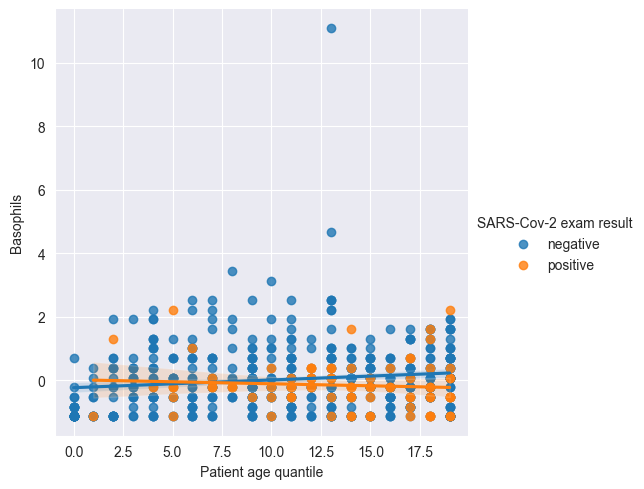

<Figure size 640x480 with 0 Axes>

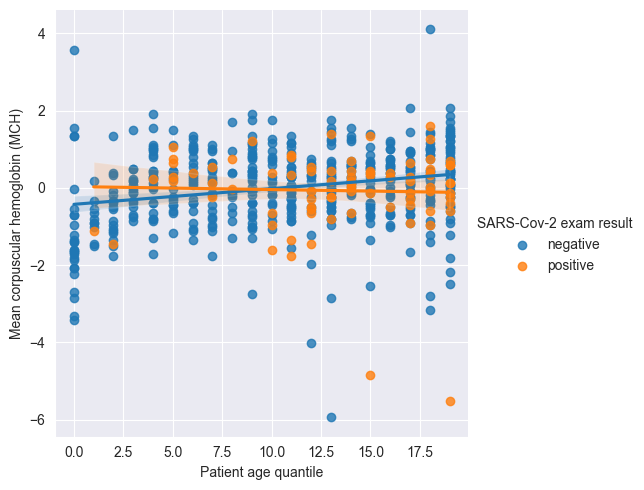

<Figure size 640x480 with 0 Axes>

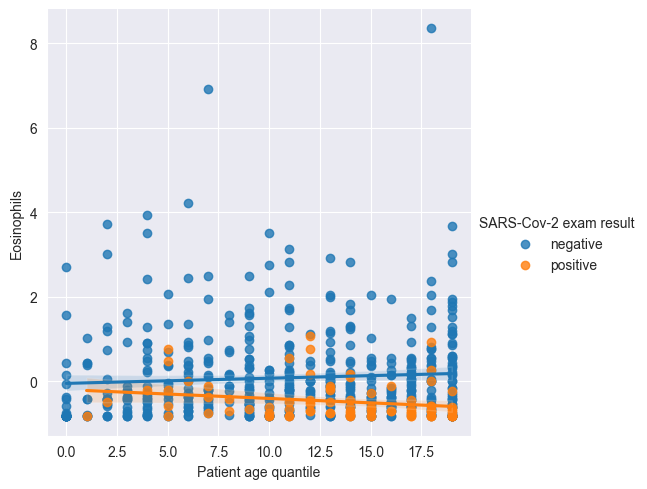

<Figure size 640x480 with 0 Axes>

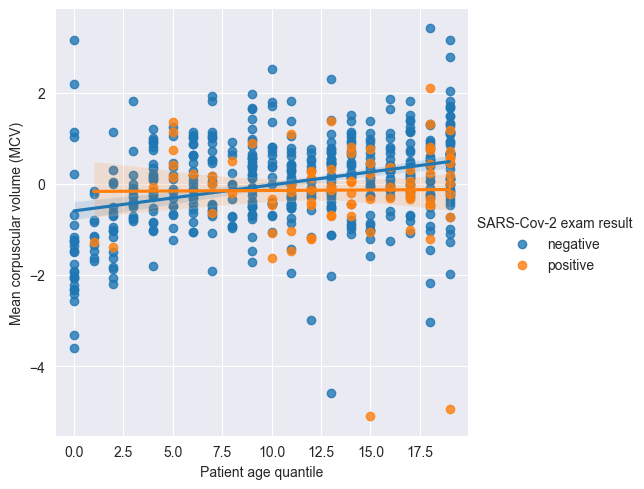

<Figure size 640x480 with 0 Axes>

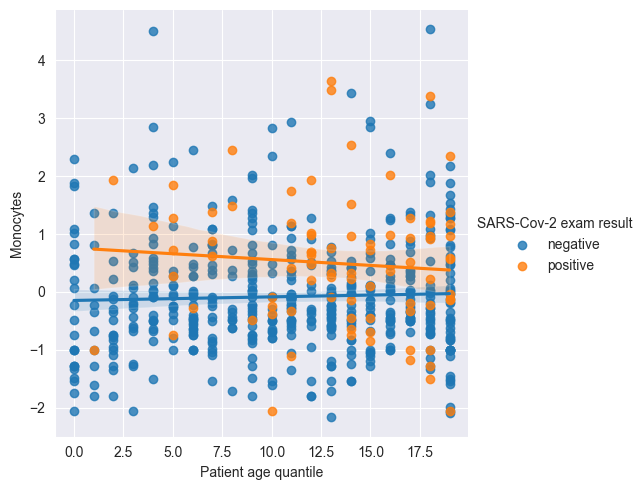

<Figure size 640x480 with 0 Axes>

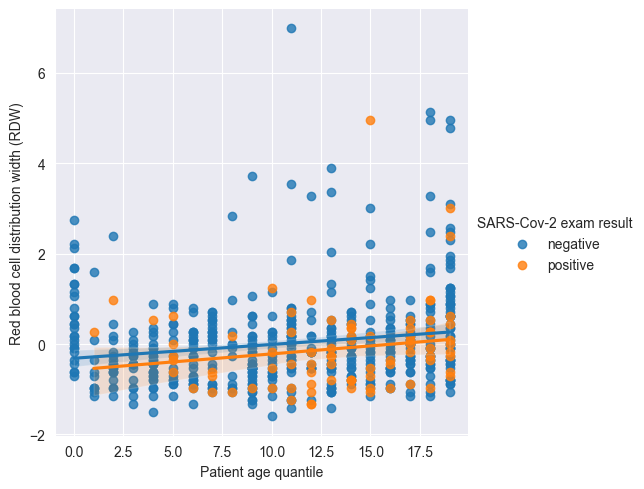

In [27]:
for col in blood_columns:
    plt.figure()
    sns.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data=df_covid19)

On constate que :
- nos 2 droites de régression ne sont pas superposées les une des autres ce qui est bien
- On a quelques outliners
- La relation linéaire entre chacune des deux variables [blood /Age] est très faible

***On continue encore notre analyse détaillée avec Age et blood en traçant la corrélation***

In [28]:
cols = ['Patient age quantile','Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes','Leukocytes', 'Basophils',
        'Mean corpuscular hemoglobin (MCH)', 'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
        'Red blood cell distribution width (RDW)']
df_age_blood = df_covid19[cols]
df_age_blood.corr()['Patient age quantile'].sort_values()

Leukocytes                                -0.166386
Platelets                                 -0.158683
Lymphocytes                               -0.125935
Red blood Cells                           -0.037510
Eosinophils                                0.022085
Monocytes                                  0.050962
Hemoglobin                                 0.060320
Hematocrit                                 0.096808
Basophils                                  0.107525
Mean platelet volume                       0.119449
Red blood cell distribution width (RDW)    0.166429
Mean corpuscular hemoglobin (MCH)          0.197394
Mean corpuscular volume (MCV)              0.281655
Patient age quantile                       1.000000
Name: Patient age quantile, dtype: float64

On s'aperçoit que les coefficients de corrélation les plus élevés sont de 0.28. Ce qui est vraiment très faible comme corrélation.
Donc on déduit qu'il n'y a pas de relation entre les ages quantiles et les variables blood.
Ça ne va servir à rien de générer une hypothèse, on voit que la corrélation est ultra faible

## Relation entre Viral et Viral

In [29]:
viral_columns

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

**Relation entre ``Influenza`` et ``Influenza rapid test``**

In [30]:
pd.crosstab(df_covid19['Influenza A'], df_covid19['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

On voit qu'on a 15 cas détectés positif au ``rapid test`` tandis qu'ils sont négatifs
Et aussi lorsqu'on fait des recherches sur internet pour en savoir plus sur la variable Rapid test on apprend que c'est un test très peu fiable. Peut-être qu'on doit le laisser tomber et le supprimer.

In [31]:
pd.crosstab(df_covid19['Influenza B'], df_covid19['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

## relation Viral / Sanguin

**Création d'une nouvelle variable être malade**

In [32]:
import numpy as np

In [33]:
without_tstRapide = df_covid19[viral_columns[:-2]] # On ne prend pas en compte les tests rapides
df_covid19['est malade'] = np.sum(without_tstRapide == 'detected', axis=1) >= 1 # Au moins une maladie
df_covid19.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

   Parainfluenza 4  Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  \
0              NaN              NaN              NaN              NaN   
1     not_detected     not_detected     not_detected     not_detected   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4     not_detected     not_detected     not_detected     not_detected   

   Bordetella pertussis  Metapneumovirus  Parainfluenza 2  \
0                   NaN              NaN              NaN   
1          not_detected     not_detected     not_detected   
2                   NaN              NaN              NaN   
3                   NaN              NaN              NaN   
4          not_detected     not_detected     not_detected   

   Influenza B, rapid test  Influenza A, rapid test est malade  
0                      NaN                      NaN      False  
1                 negative                 negative       True  
2                      NaN                      NaN      False  
3                      NaN                      NaN      False  
4                      NaN                      NaN       True  

[5 rows x 39 columns]

In [34]:
malade_df = df_covid19[df_covid19['est malade']== True]
non_malade_df = df_covid19[df_covid19['est malade']== False]

C:\Users\luis\AppData\Local\Temp\ipykernel_9056\2131445990.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col], label='malade')
C:\Users\luis\AppData\Local\Temp\ipykernel_9056\2131445990.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col], label='non malade')
C:

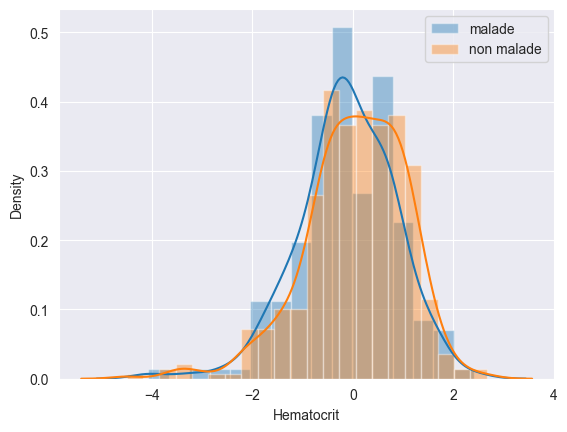

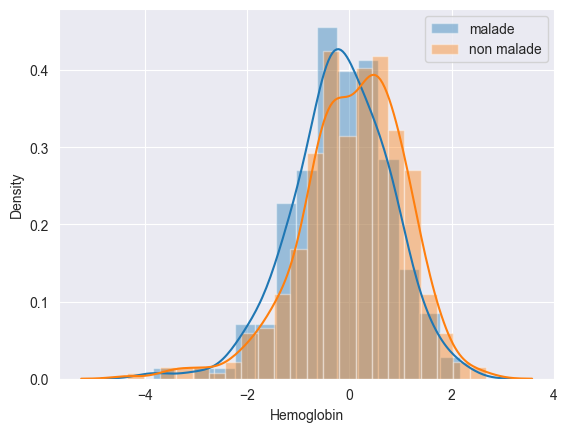

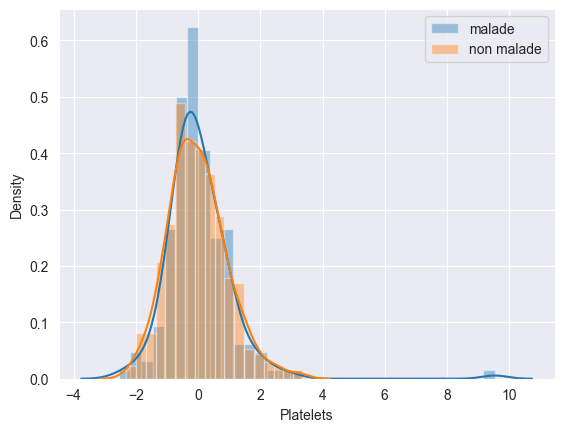

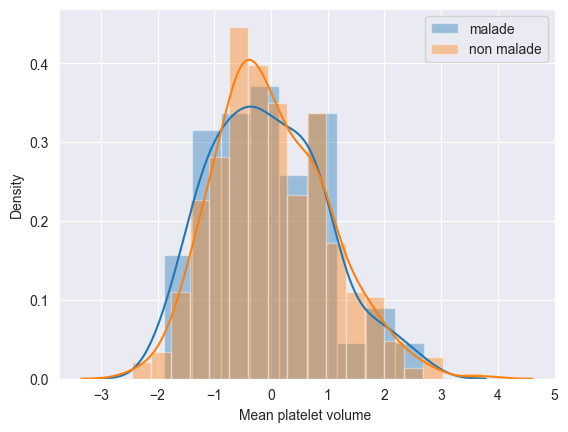

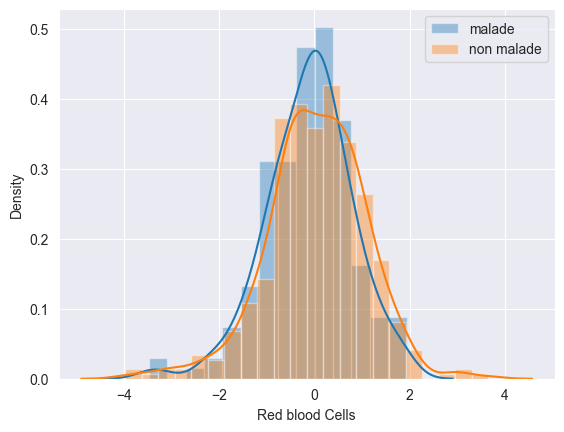

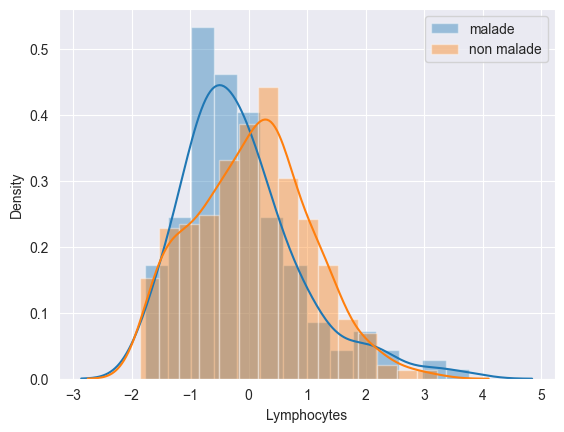

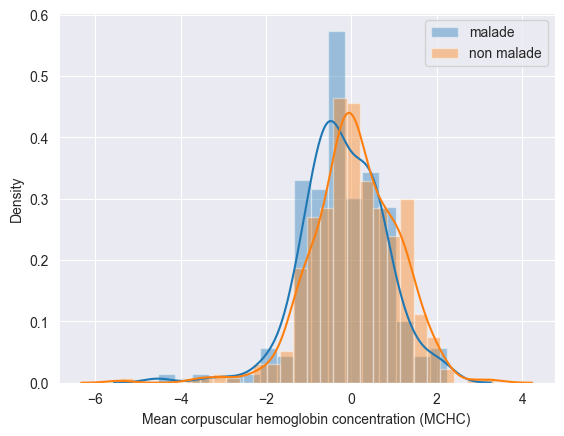

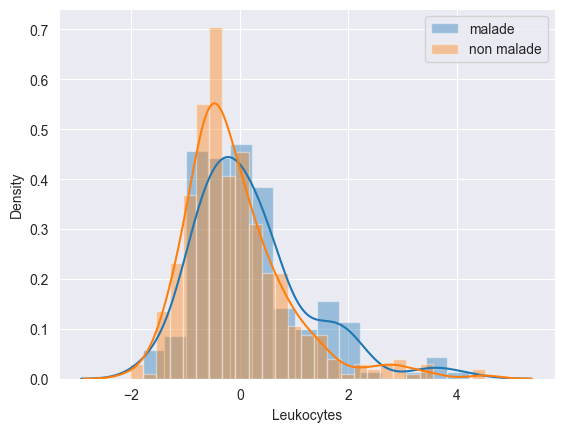

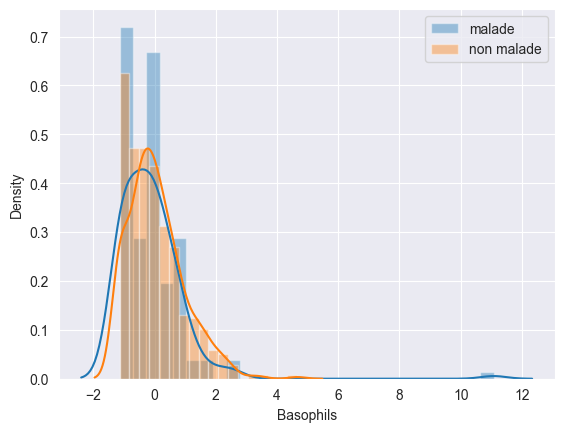

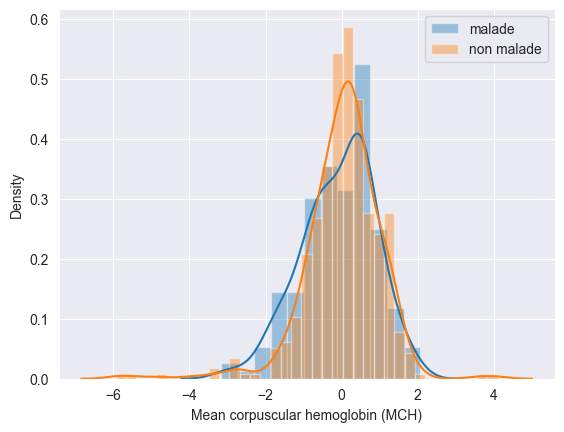

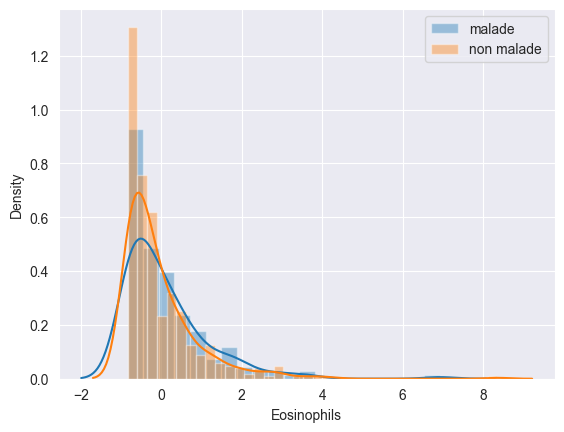

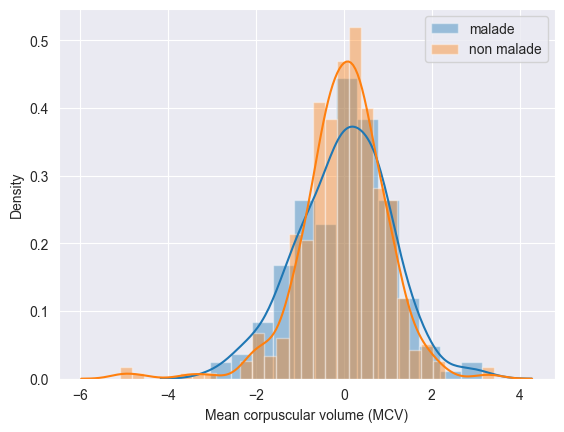

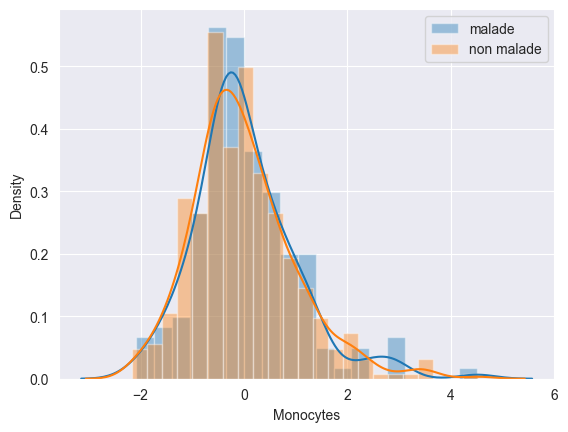

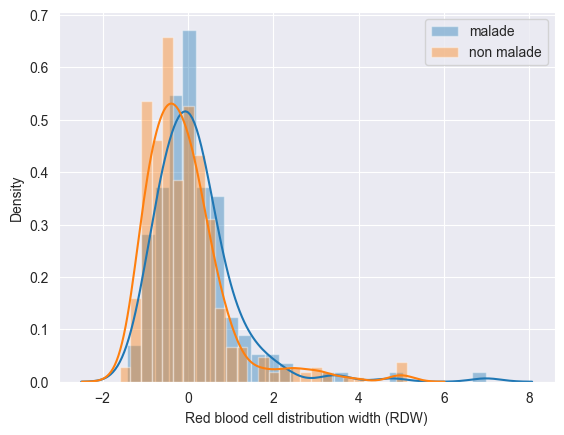

In [35]:
for col in blood_columns:
    plt.figure()
    sns.distplot(malade_df[col], label='malade')
    sns.distplot(non_malade_df[col], label='non malade')
    plt.legend()

Nous remarquons que le Lymphocyte est un peu décalé. Ce qui pourrait être une observation importante

##  Relation Hospitalisation / est malade

In [36]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)']:
        return 'soins semi-intensives'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)']:
        return 'soins intensifs'
    else:
        return 'inconnu'

In [37]:
df_covid19['status'] = df_covid19.apply(hospitalisation, axis=1)
df_covid19.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

   Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  Bordetella pertussis  \
0              NaN              NaN              NaN                   NaN   
1     not_detected     not_detected     not_detected          not_detected   
2              NaN              NaN              NaN                   NaN   
3              NaN              NaN              NaN                   NaN   
4     not_detected     not_detected     not_detected          not_detected   

   Metapneumovirus  Parainfluenza 2  Influenza B, rapid test  \
0              NaN              NaN                      NaN   
1     not_detected     not_detected                 negative   
2              NaN              NaN                      NaN   
3              NaN              NaN                      NaN   
4     not_detected     not_detected                      NaN   

   Influenza A, rapid test  est malade   status  
0                      NaN       False  inconnu  
1                 negative        True  inconnu  
2                      NaN       False  inconnu  
3                      NaN       False  inconnu  
4                      NaN        True  inconnu  

[5 rows x 40 columns]

C:\Users\luis\AppData\Local\Temp\ipykernel_9056\252937233.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_covid19[df_covid19.status == cat][col], label=cat)
C:\Users\luis\AppData\Local\Temp\ipykernel_9056\252937233.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_covid19[df_covid19.

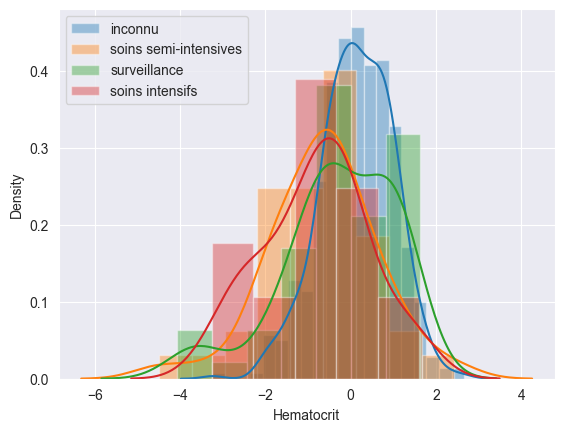

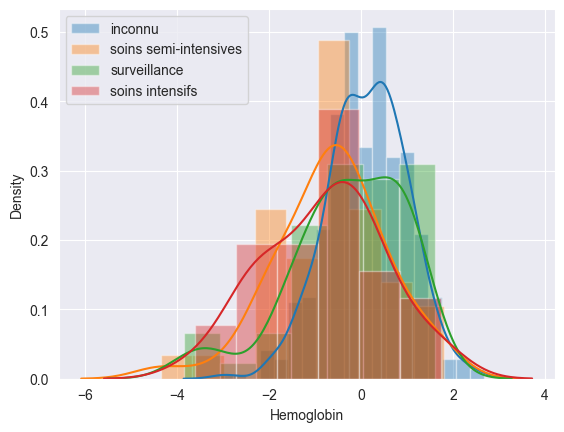

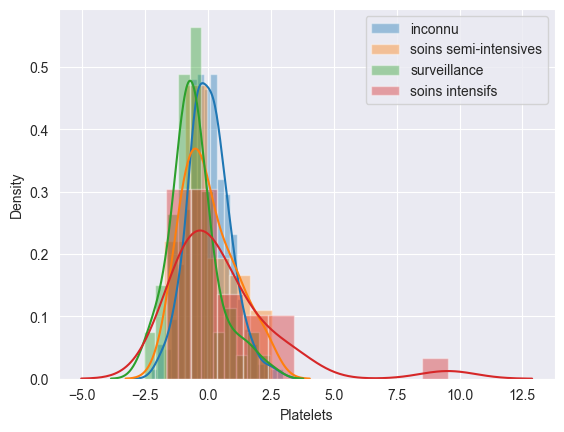

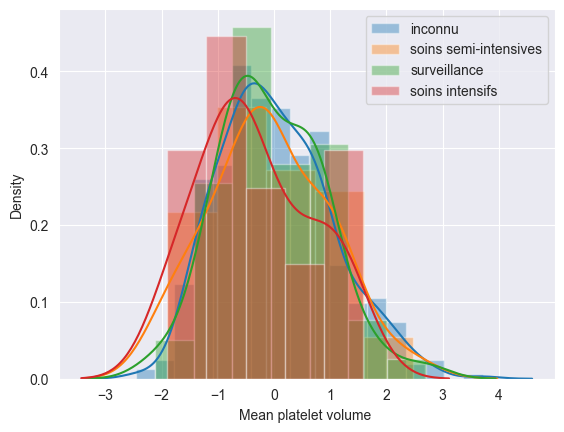

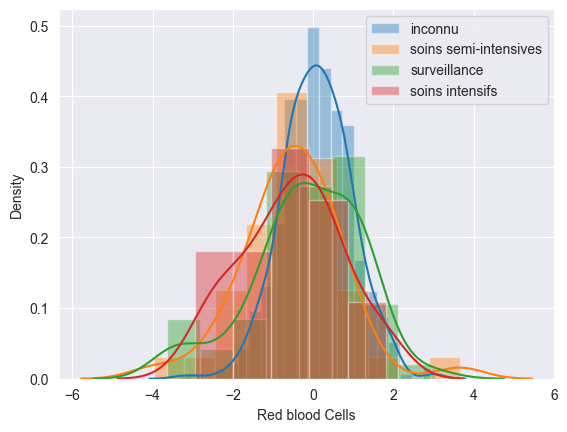

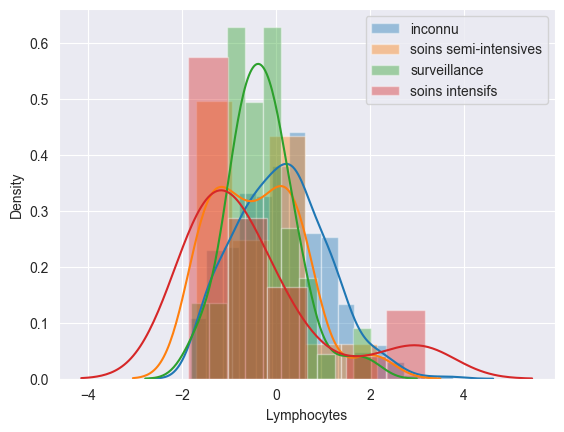

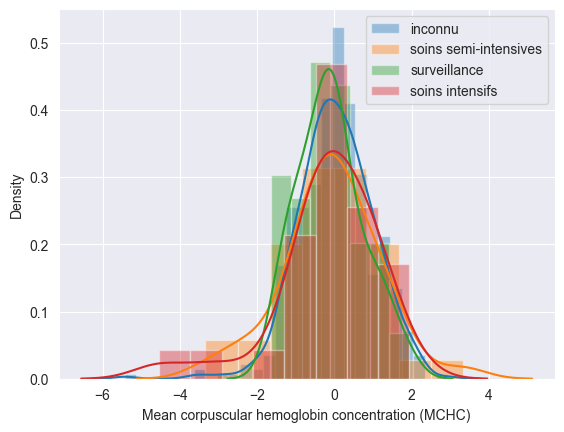

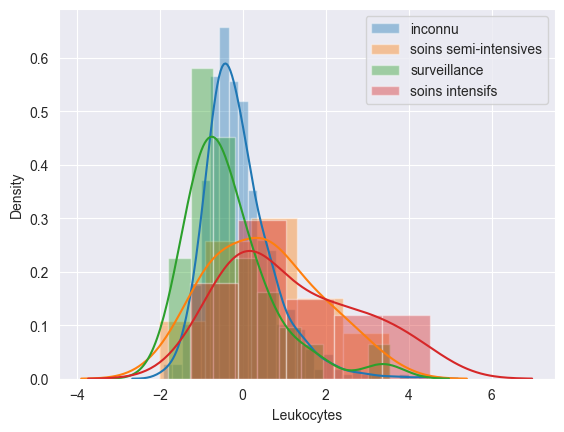

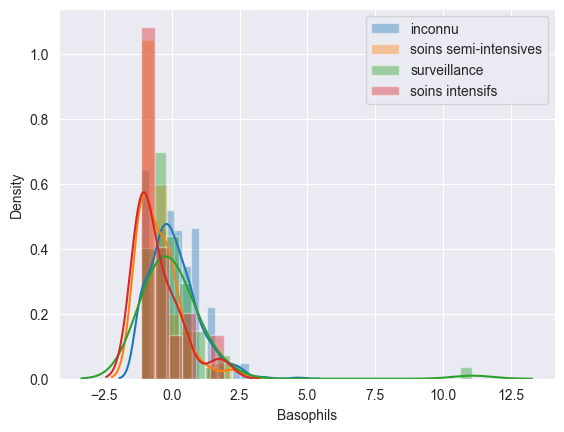

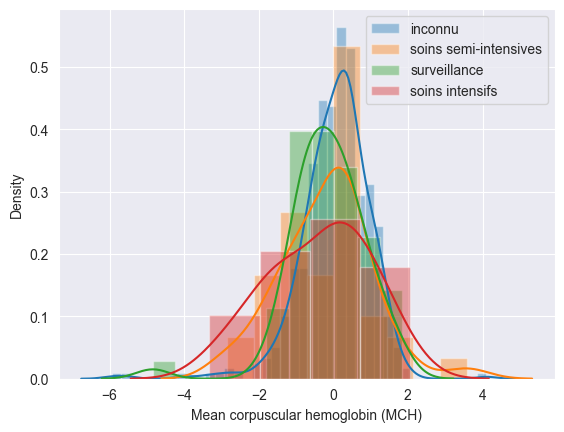

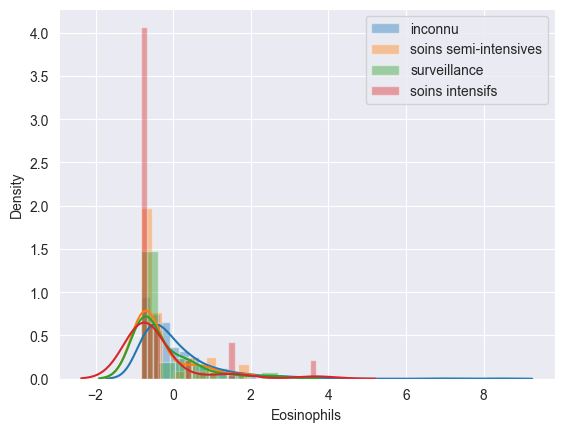

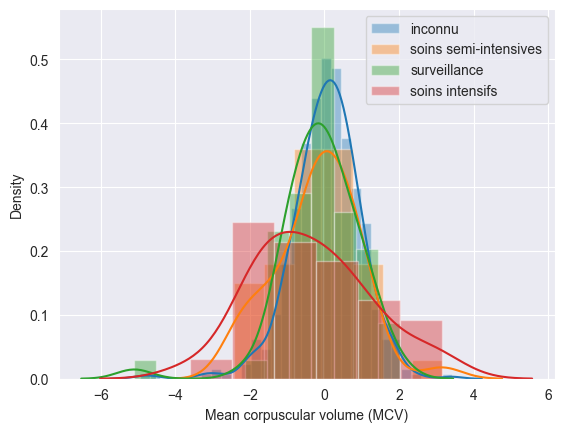

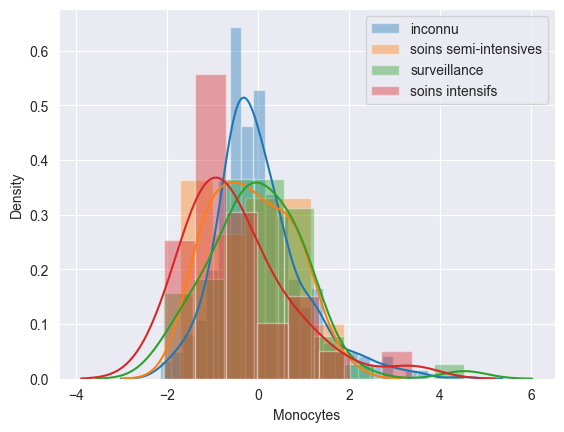

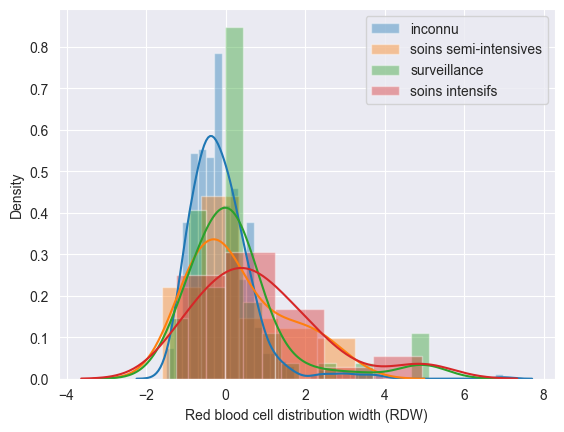

In [38]:
for col in blood_columns:
    plt.figure()
    for cat in df_covid19.status.unique():
        sns.distplot(df_covid19[df_covid19.status == cat][col], label=cat)
    plt.legend()

Les personnes admises en soins intensifs ont un taux de Leukocytes vraiment différent.

# NaN Analyse

**Si on décide de supprimer toutes les valeurs manquantes qu'est-ce qu'on aura ?**

In [39]:
df_covid19.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)           

99 samples pour notre train, ce qui n'est pas du tout bon.

In [40]:
df_covid19[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

On aura 1354 samples si on décide travailler avec uniquement les variables virales

In [41]:
df_covid19[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

On aura 602 samples si on décide travailler avec uniquement les variables virales

**ALors quel est l'état de notre target si on élimine toutes les valeurs manquantes si on sélectionne un certain groupe**

In [42]:
# Cas de Viral
df1 = without_tstRapide
df1['covid'] = df_covid19['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

C:\Users\luis\AppData\Local\Temp\ipykernel_9056\748200080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid'] = df_covid19['SARS-Cov-2 exam result']


covid
negative    0.91716
positive    0.08284
Name: proportion, dtype: float64

On aura à peu près la même proportion

In [43]:
# Cas de Viral
df2 = df_covid19[blood_columns]
df2['covid'] = df_covid19['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize=True)

C:\Users\luis\AppData\Local\Temp\ipykernel_9056\1346403774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['covid'] = df_covid19['SARS-Cov-2 exam result']


covid
negative    0.864548
positive    0.135452
Name: proportion, dtype: float64

On aura à peu près, mais beaucoup mieux qu'avant

# HYPOTHESE H0

In [44]:
from scipy.stats import ttest_ind

**Les individus atteints du covid 19**

In [45]:
positive_df.shape

(558, 38)

In [46]:
negative_df.shape

(5086, 38)

In [47]:
# Pour appliquer le test de student il faut que les deux ait la même taille
balanced_neg = negative_df.sample(positive_df.shape[0])

In [48]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_neg[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return 'HO Rejetée'
    else:
        return 0

In [49]:
for col in blood_columns:
    print(f'{col :-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- HO Rejetée
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- HO Rejetée
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- HO Rejetée
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- HO Rejetée
Red blood cell distribution width (RDW)----------- 0


Nous obtenons que le test de student a rejeté l'hypothèse HO sur les variables :
- Monocytes
- Eosinophils
- Leukocytes
- Platelets
Donc en effet ces variables semblent être significativement différentes pour les gens atteints du corona virus

**Cas de Malade ou non malade**

In [50]:
malade_df.shape

(692, 39)

In [51]:
non_malade_df.shape

(4952, 39)

In [52]:
balanced_non_malade = non_malade_df.sample(malade_df.shape[0])

In [53]:
def t_test2(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_non_malade[col].dropna(), malade_df[col].dropna())
    if p < alpha:
        return 'HO Rejetée'
    else:
        return 0

In [54]:
for col in blood_columns:
    print(f'{col :-<50} {t_test2(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- 0
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- HO Rejetée
Leukocytes---------------------------------------- HO Rejetée
Basophils----------------------------------------- HO Rejetée
Mean corpuscular hemoglobin (MCH)----------------- HO Rejetée
Eosinophils--------------------------------------- 0
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- 0
Red blood cell distribution width (RDW)----------- HO Rejetée


In [55]:
blood_columns.shape

(14,)

Dans ce cas l'hypothèse H0 est rejetée 5/14